<h1> Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

- Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Set the maximum number of rows and columns displayed

In [4]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

- Load and Read the data

In [5]:
url = "/content/drive/MyDrive/corona_project/dataset.csv"
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

In [6]:
data.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


### An overview of our data

In [7]:
df = data.copy()
# the shape of the dataset
df.shape

(5644, 110)

In [8]:
# Columns data type
df.dtypes

Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglobin (MCH)                        float64
Eosinophils              

In [9]:
df.dtypes.value_counts()

float64    70
object     36
int64       4
dtype: int64

<Axes: >

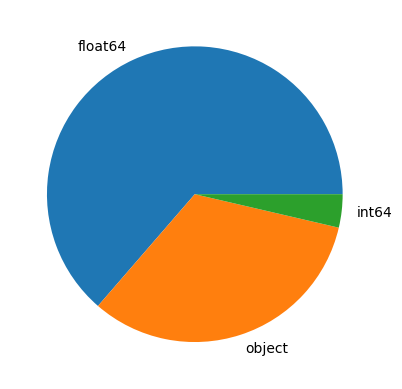

In [10]:
df.dtypes.value_counts().plot.pie()

<Axes: ylabel='Patient ID'>

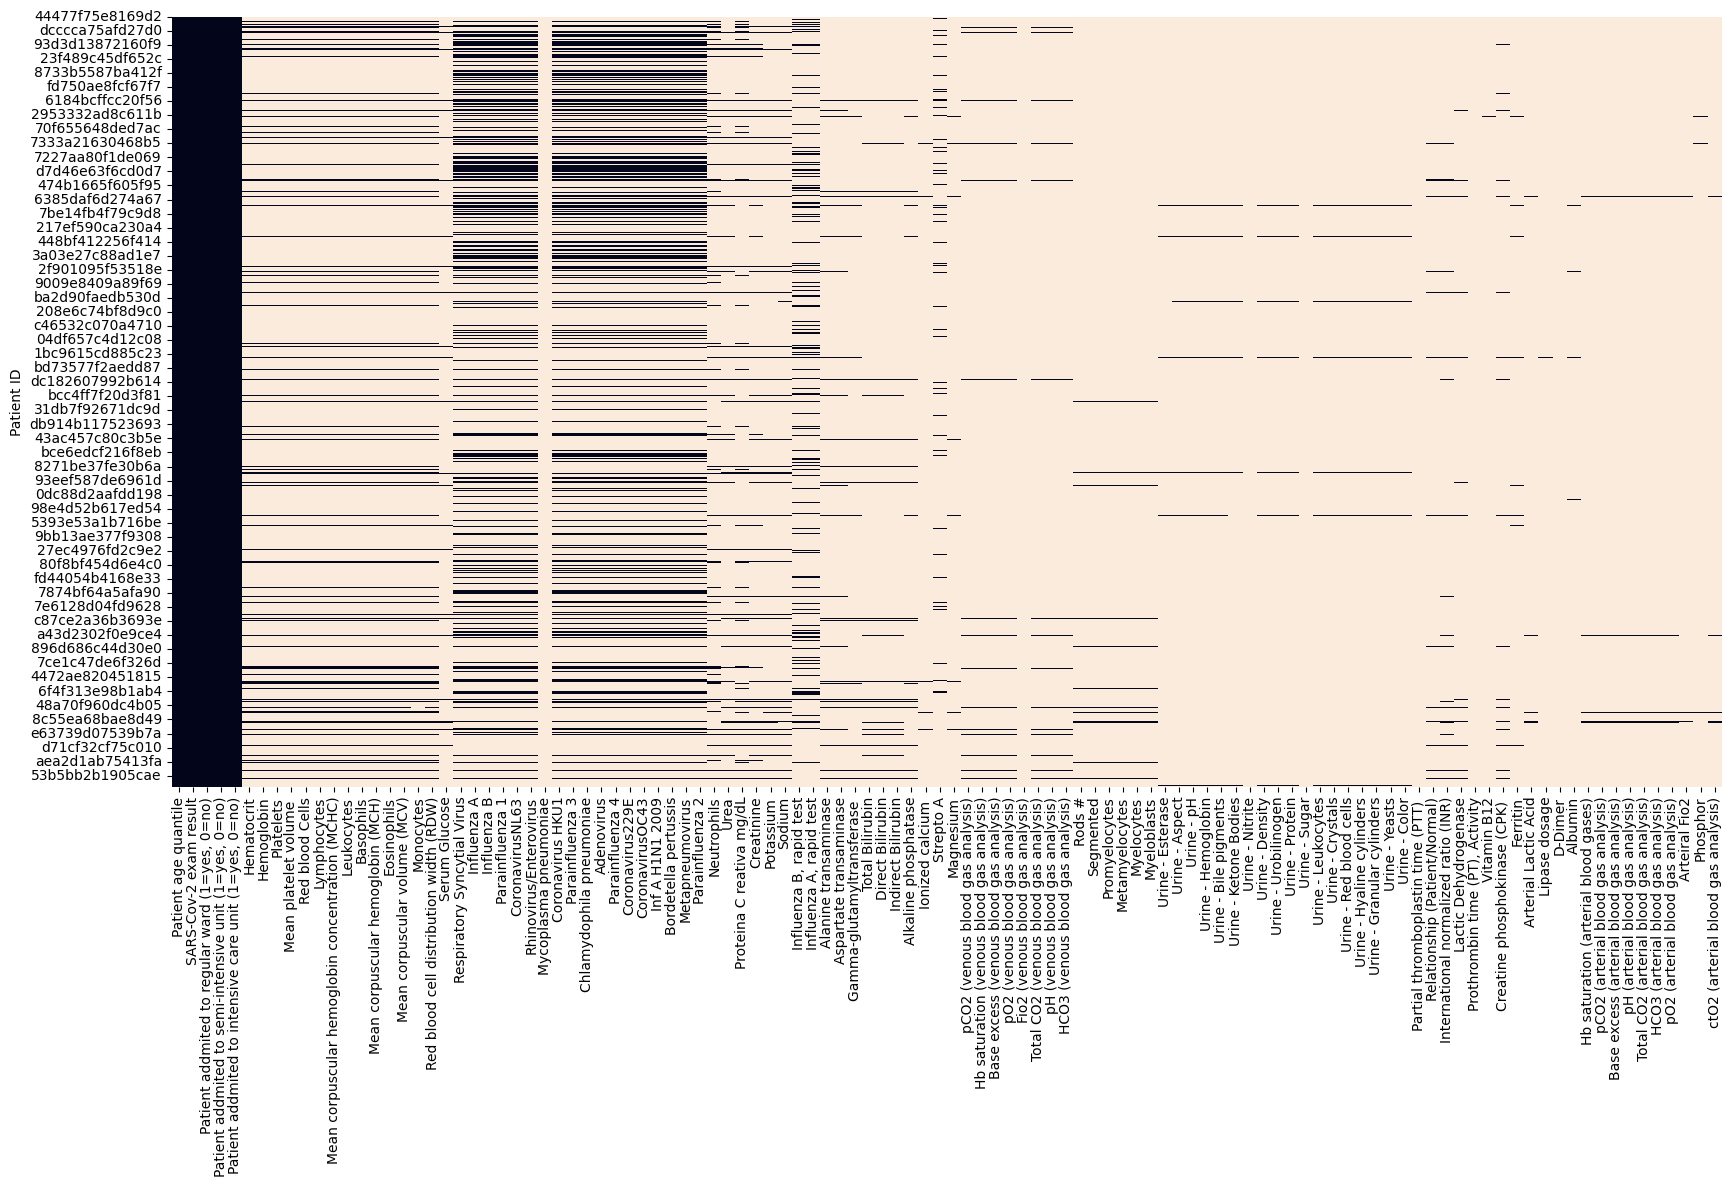

In [11]:
# Visualize nan values
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

** We notice that there are a lot of Nan values, (half of the variables > 90% of NaN )

** 2 main groups of data: ~76% of nan values & ~89% of Nan values.

In [13]:
# - Eliminate columns with pourcentage of Nan Values > 90%
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


<Axes: ylabel='Patient ID'>

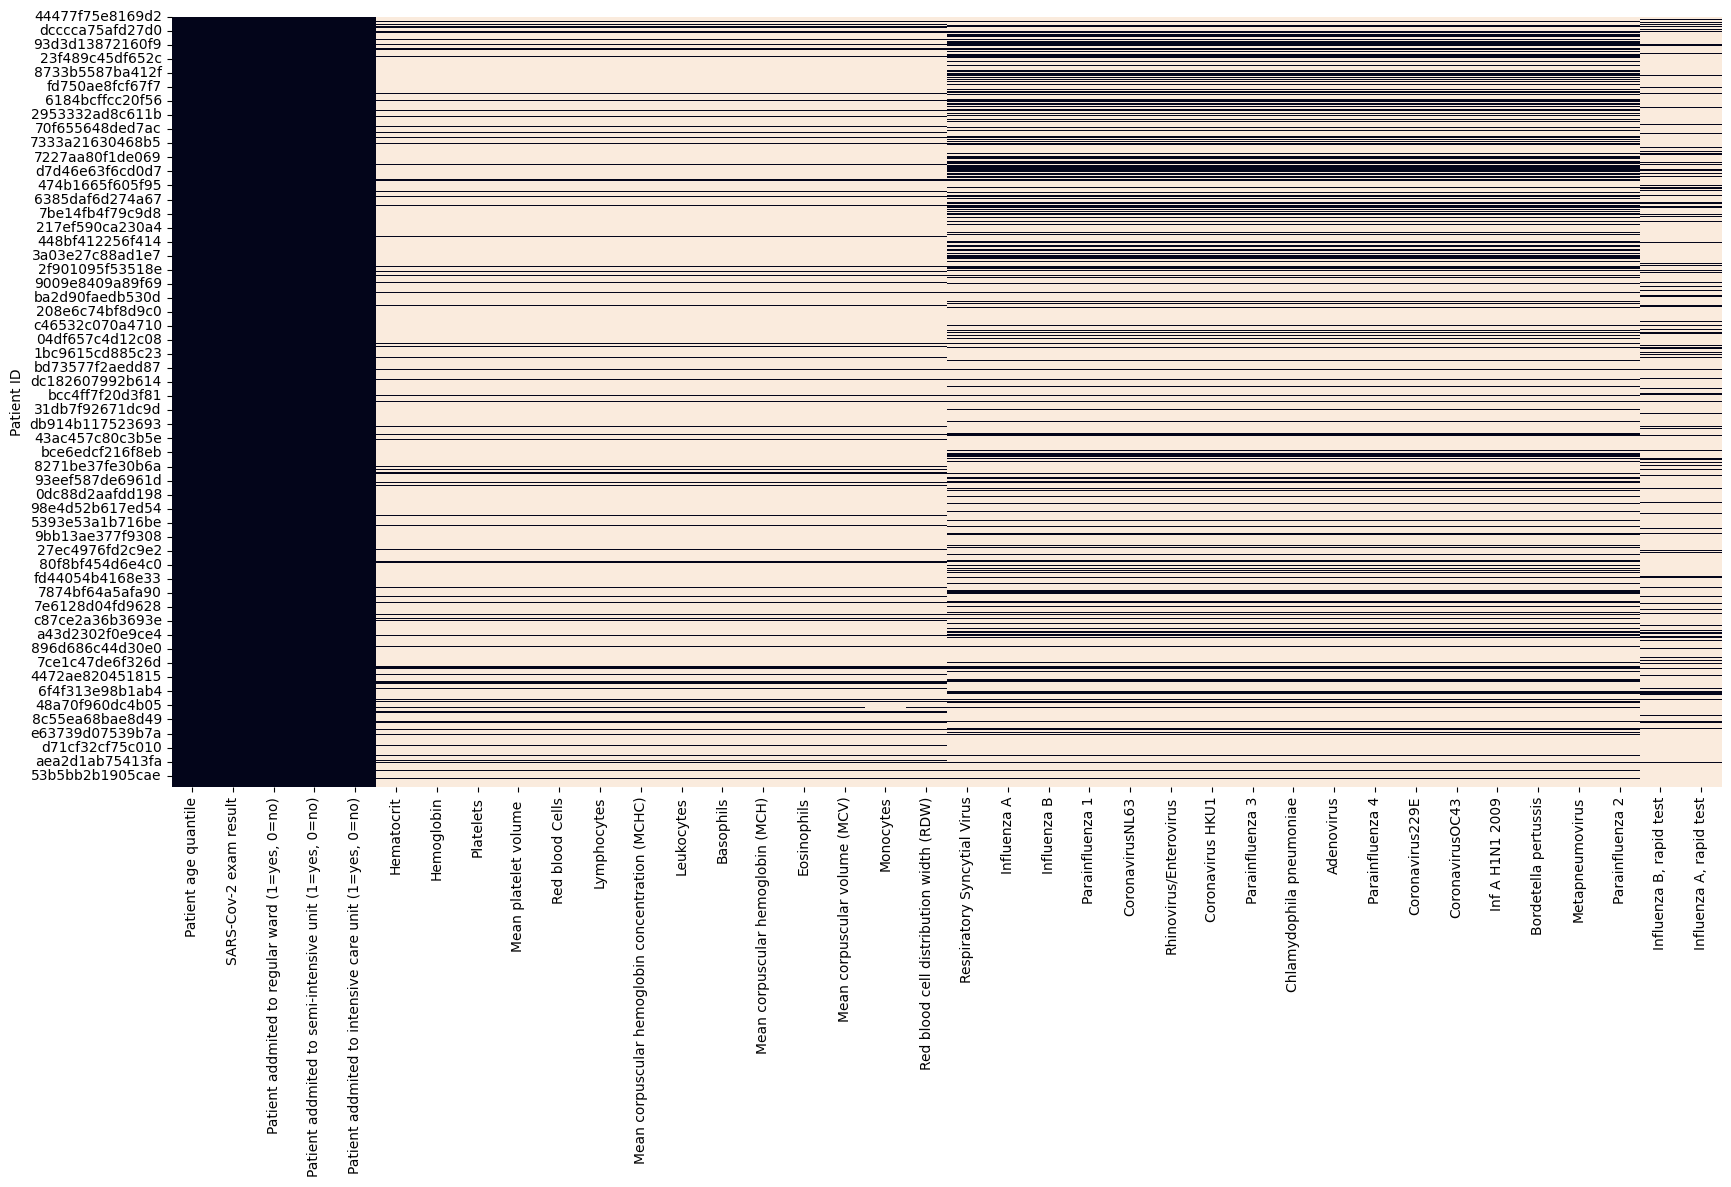

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [15]:
# Checking the target column
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

** The target variable is imbalaced

### Histograms for continuous variables

<ipython-input-16-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-16-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-16-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

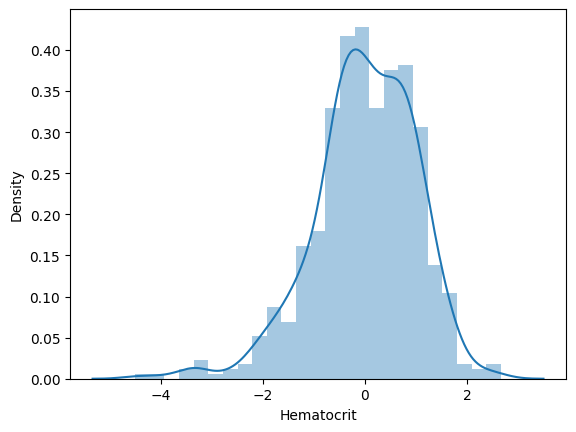

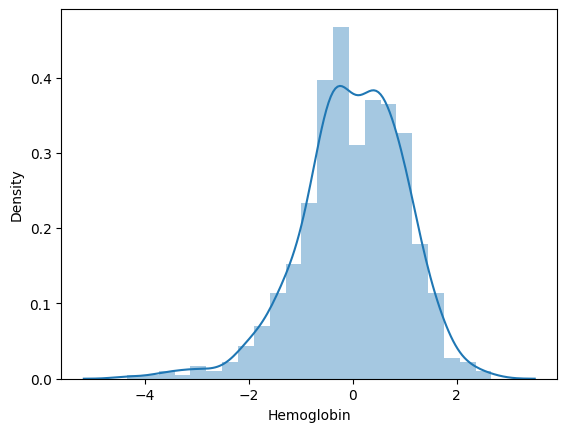

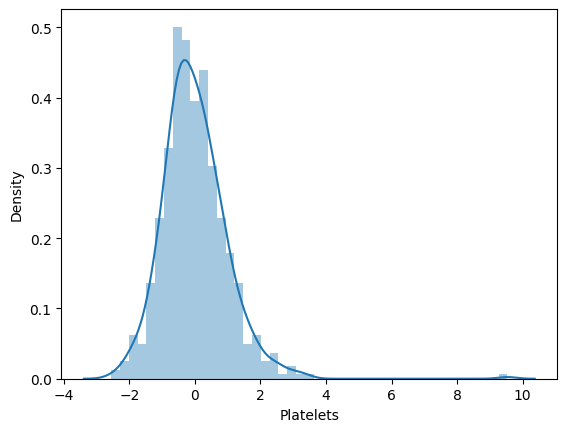

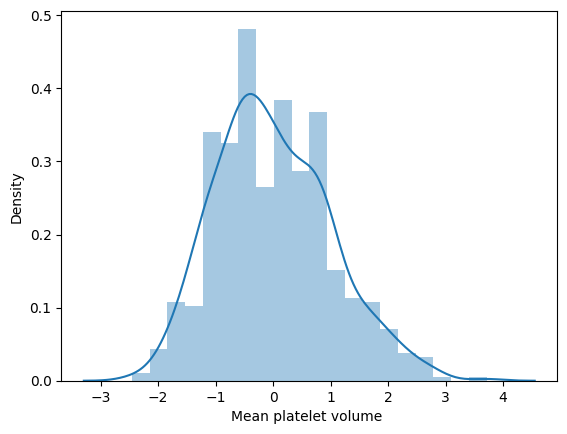

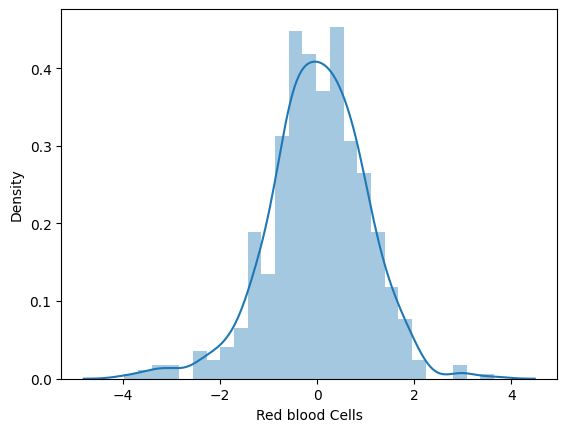

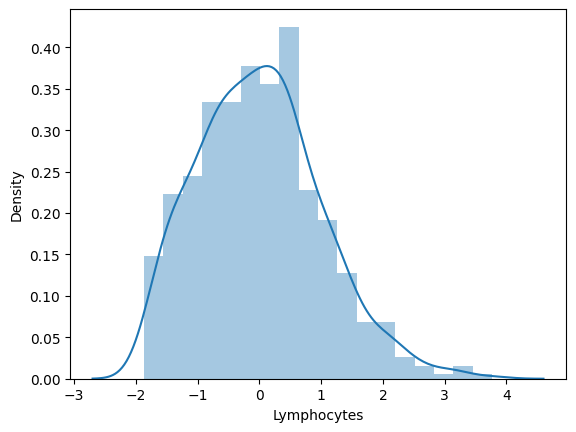

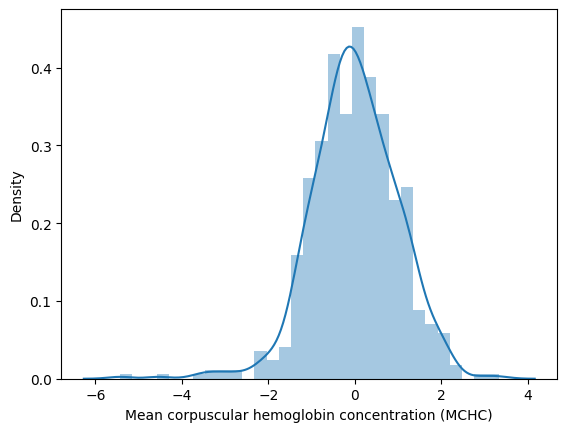

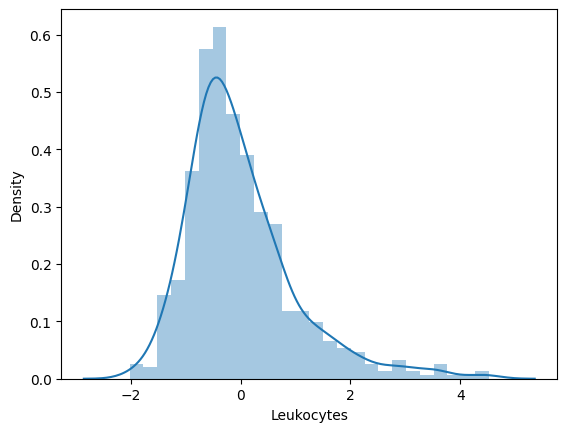

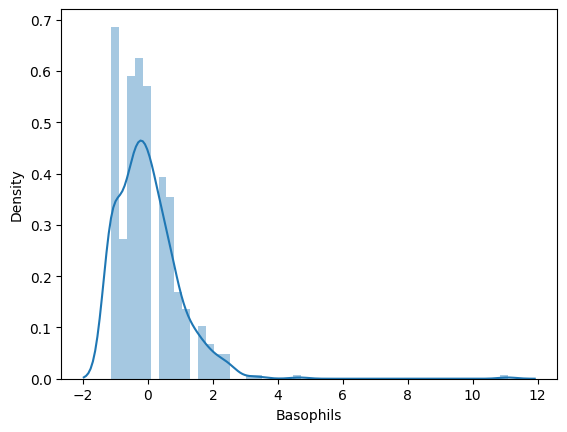

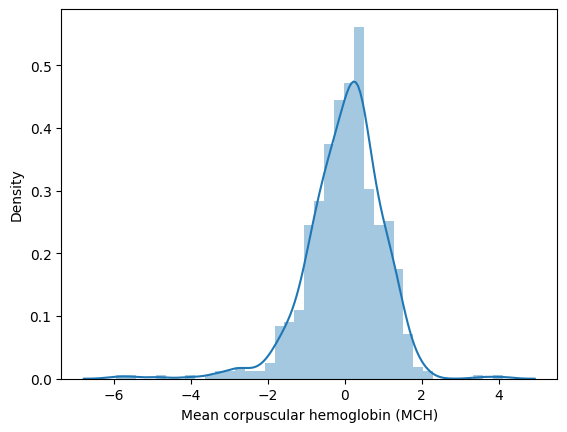

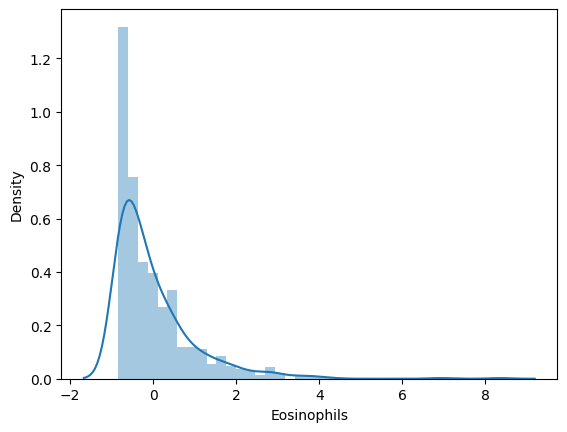

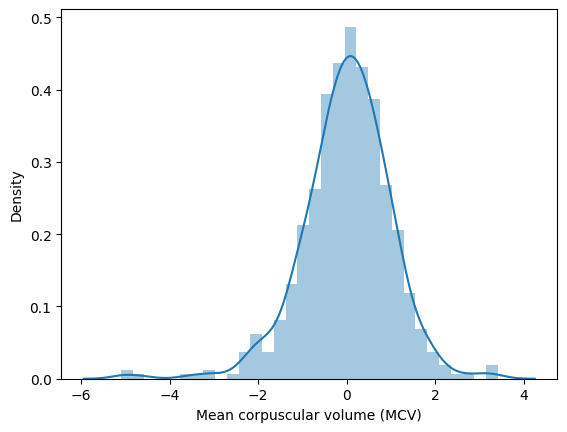

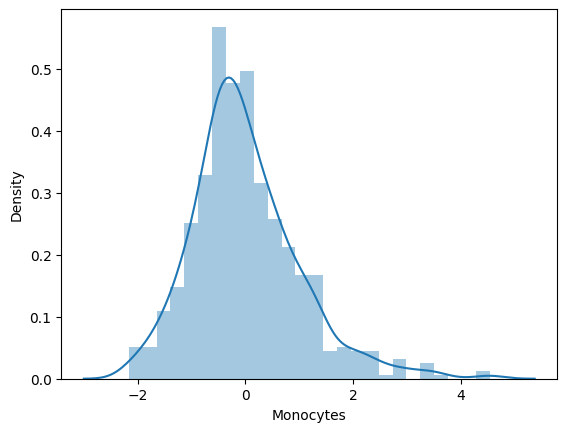

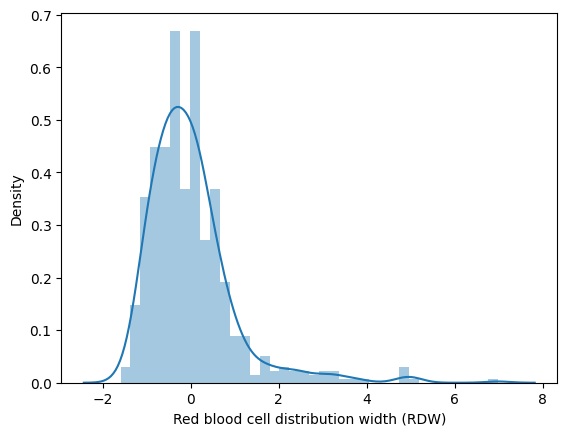

In [16]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

<ipython-input-17-85a71a091f9e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Patient age quantile'], bins=20)


<Axes: xlabel='Patient age quantile', ylabel='Density'>

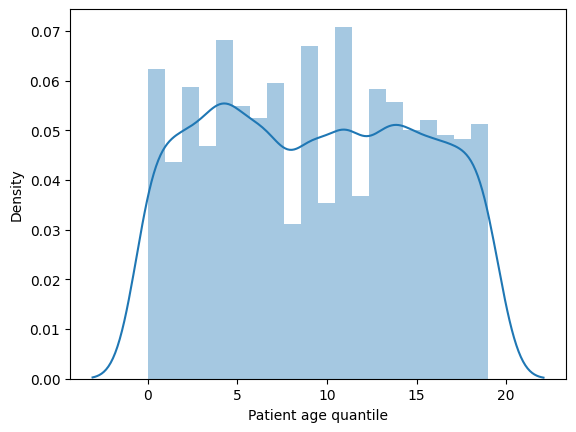

In [17]:
sns.distplot(df['Patient age quantile'], bins=20)

In [18]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

### Qualitative variables

In [19]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

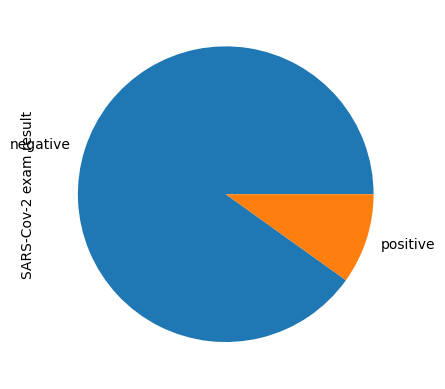

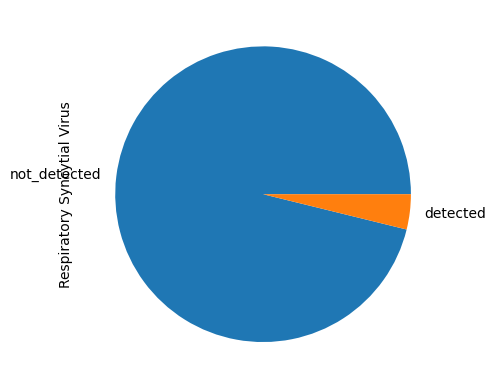

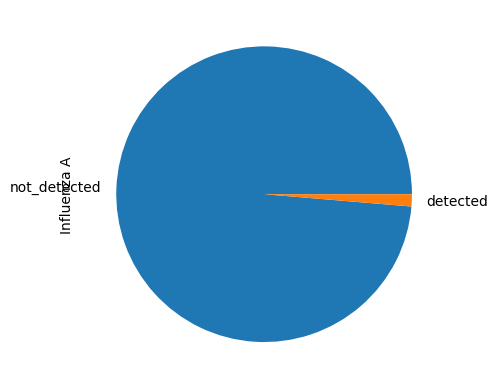

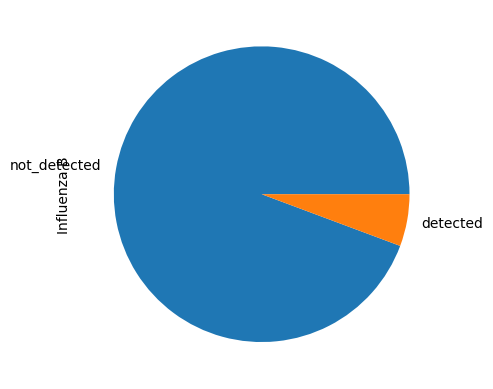

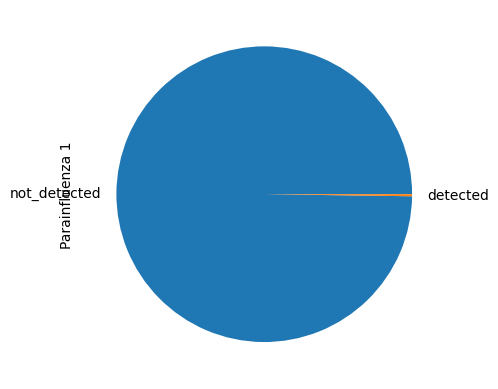

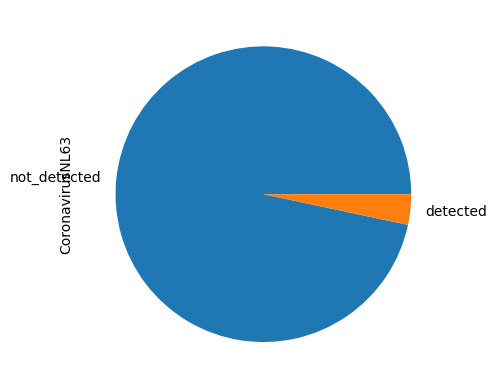

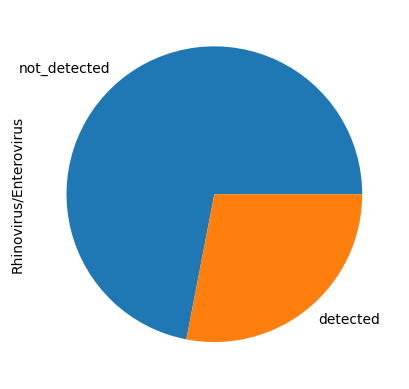

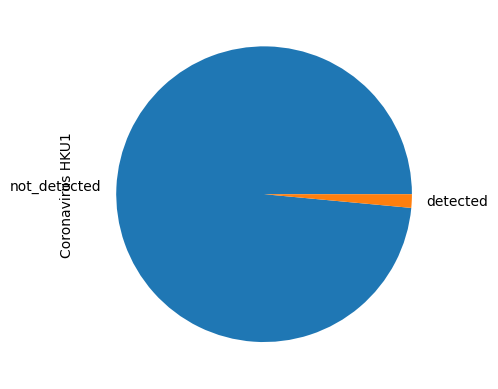

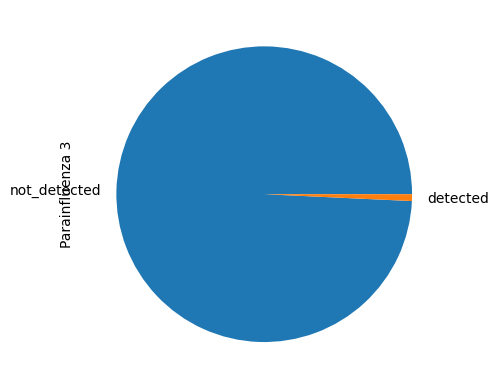

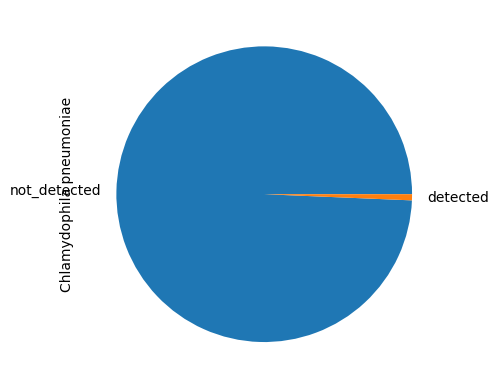

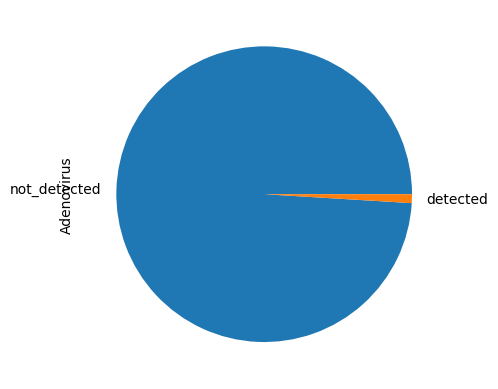

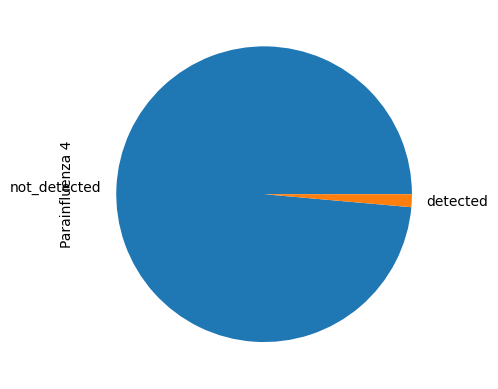

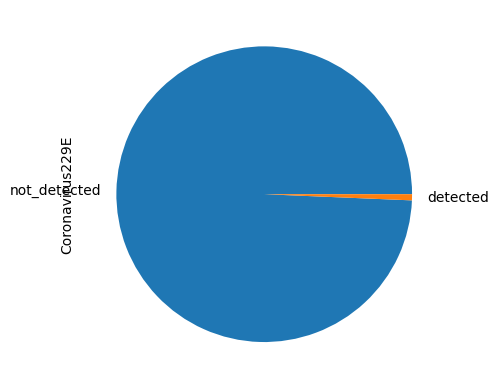

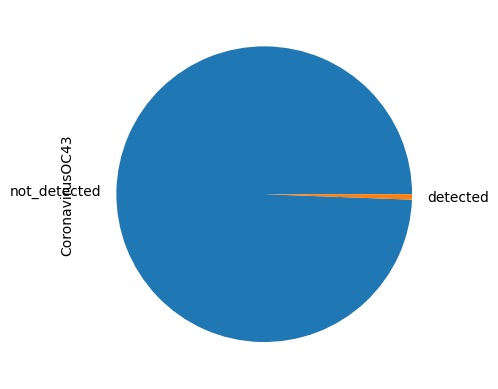

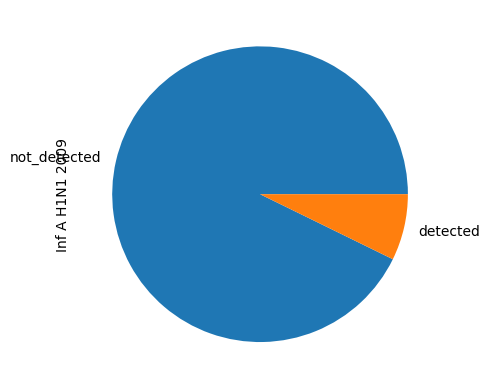

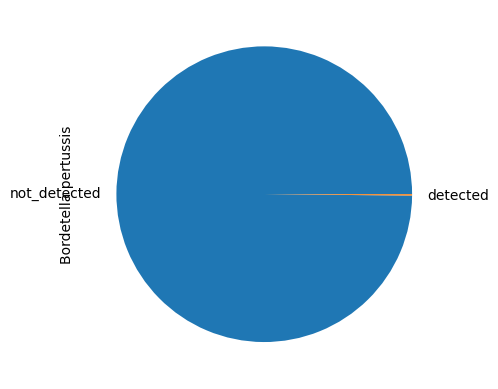

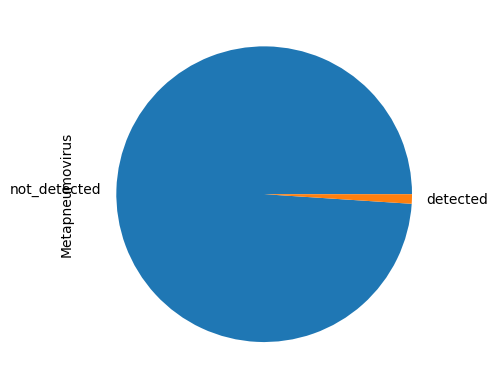

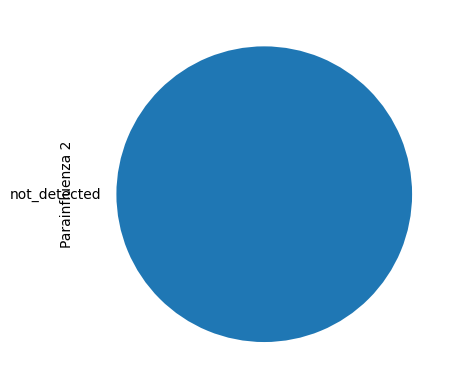

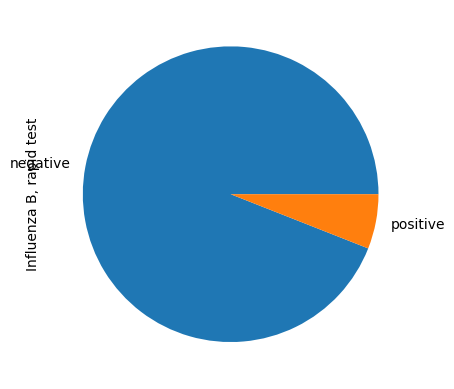

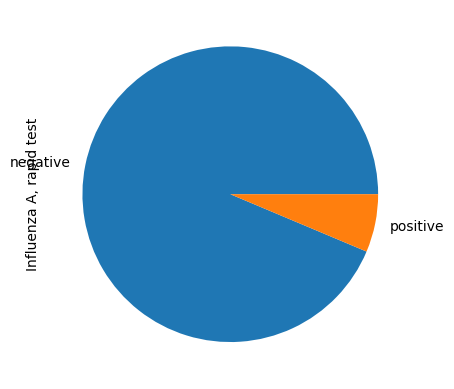

In [20]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Target / Variables relationship
### Create positive and negative subsets

In [21]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [22]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Creating Blood and viral sets

In [23]:
missing_rate = df.isna().sum()/df.shape[0]

In [24]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]

In [25]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

### Target / Blood

<ipython-input-26-70c83de426ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='positive')
<ipython-input-26-70c83de426ce>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], label='negative')
<ipython-input-26-70c83de426ce>:3: UserWarning: 

`distplot` i

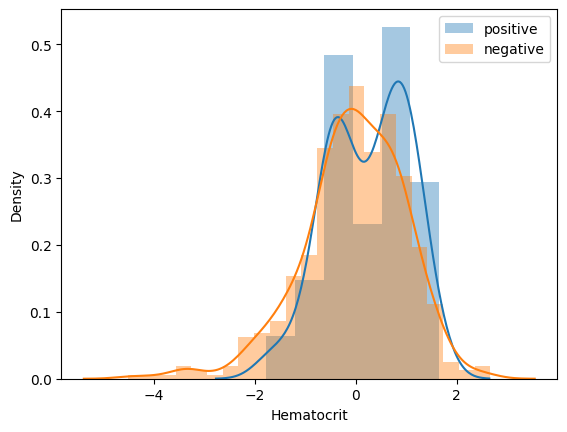

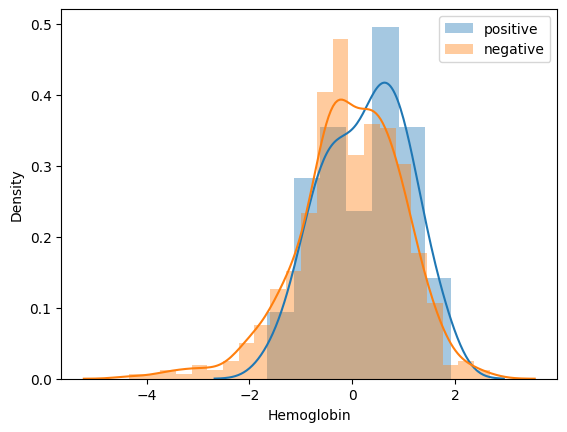

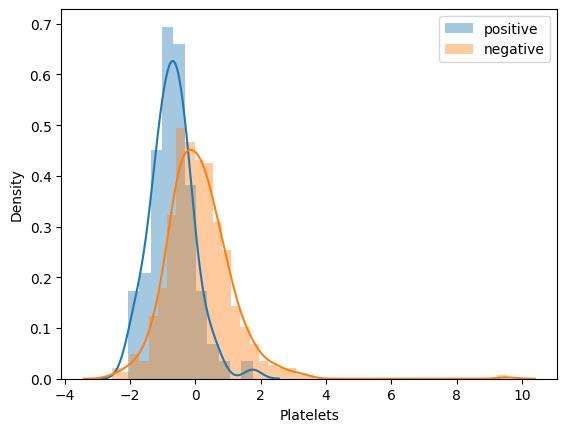

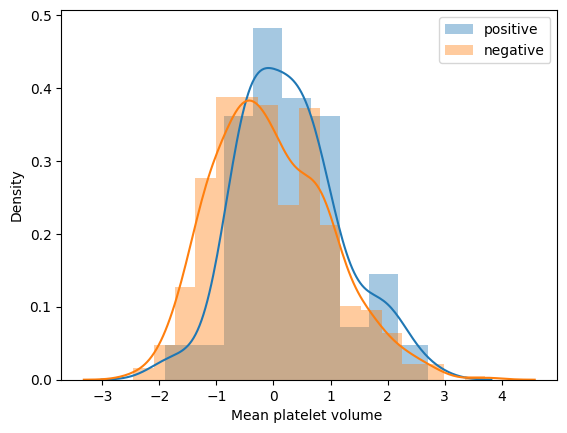

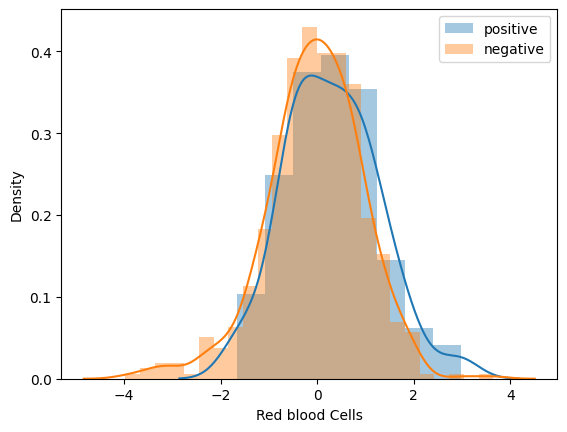

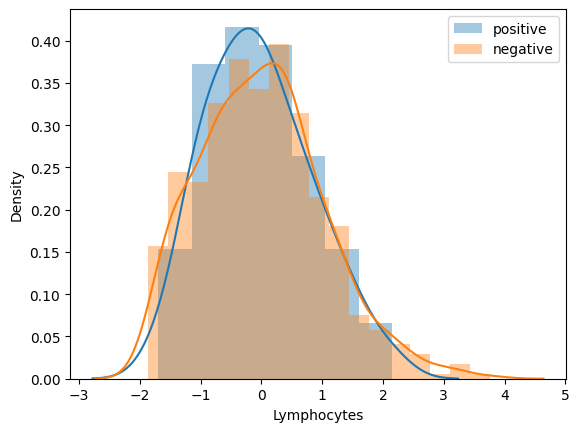

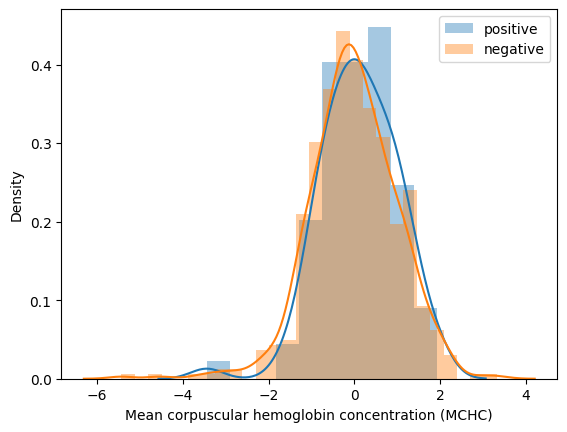

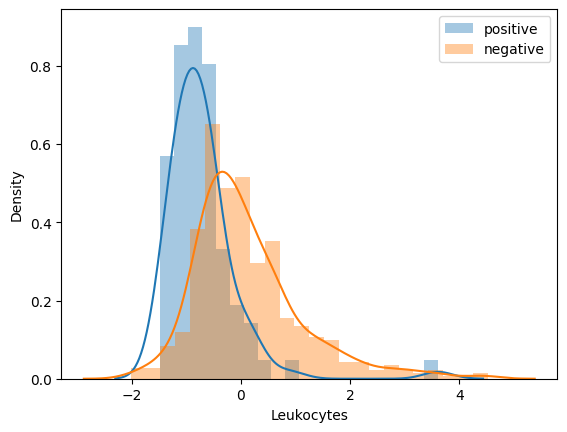

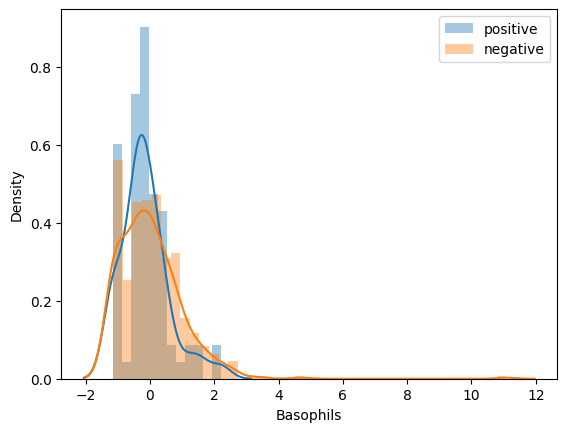

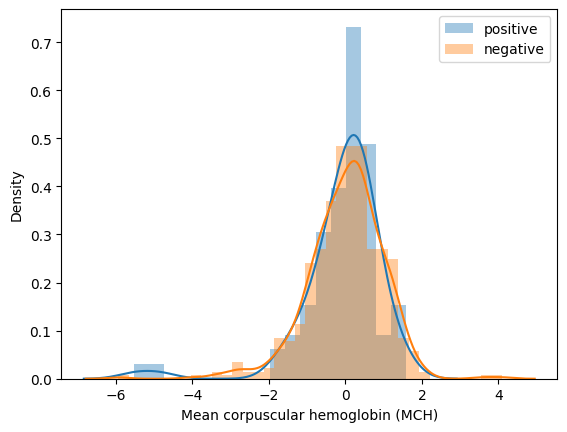

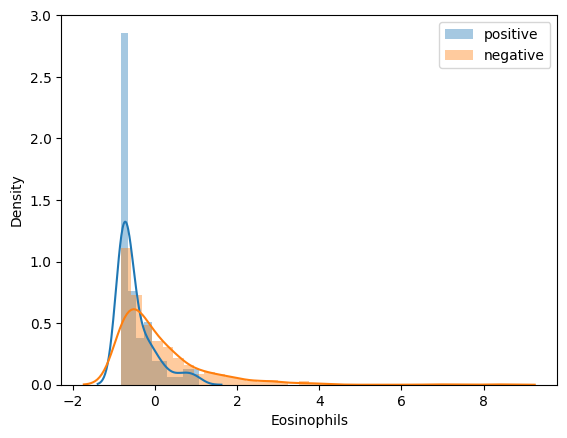

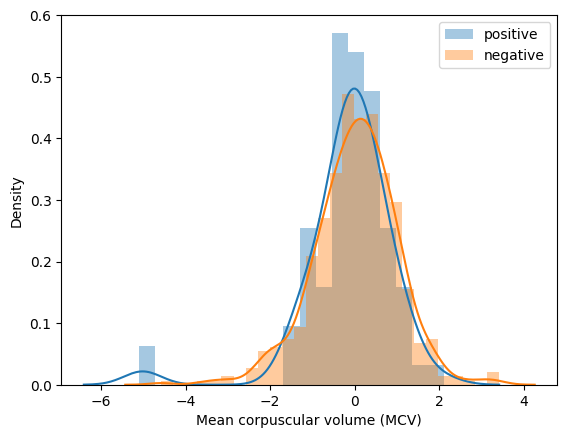

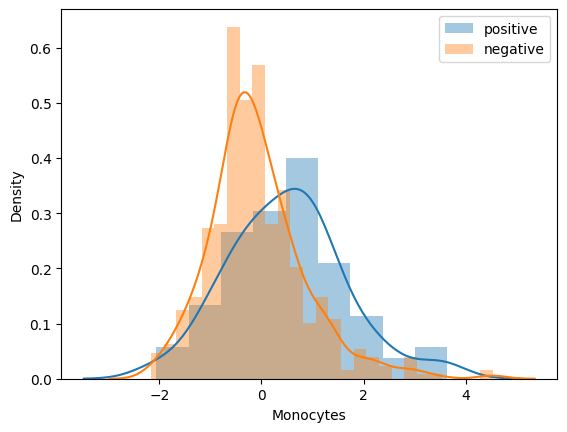

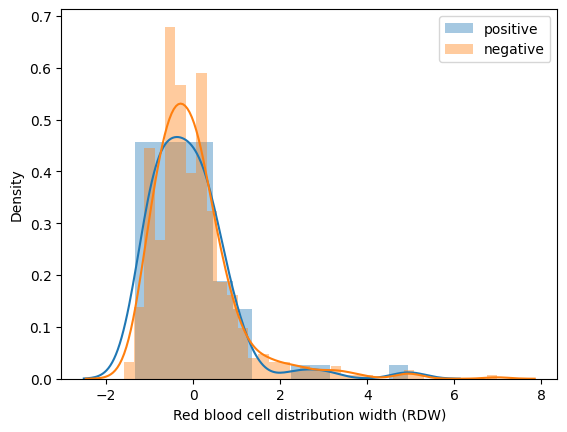

In [26]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

** The levels of Monocytes, Platelets, Leukocytes seem to be linked to the attack of covid-19.

### Relationship Target / age

<Axes: xlabel='Patient age quantile', ylabel='count'>

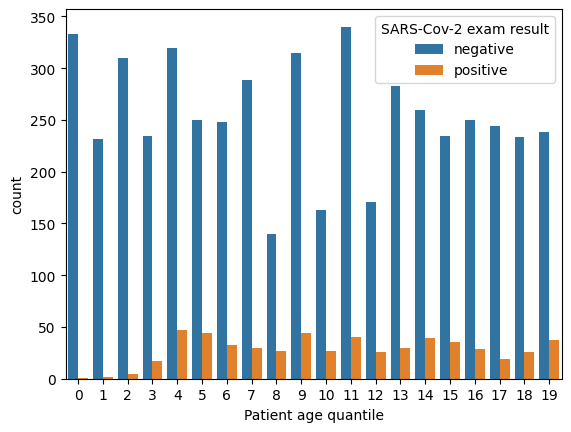

In [27]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

### Relationship Target / Viral

In [28]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

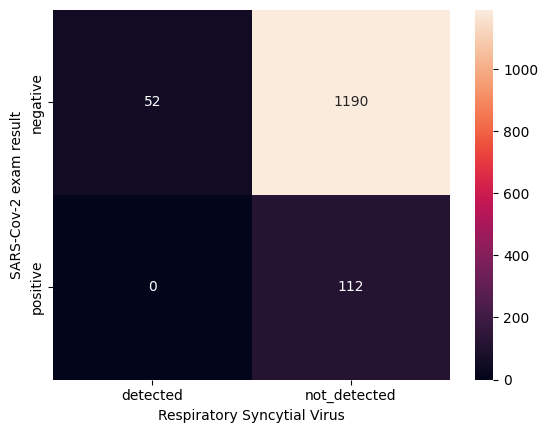

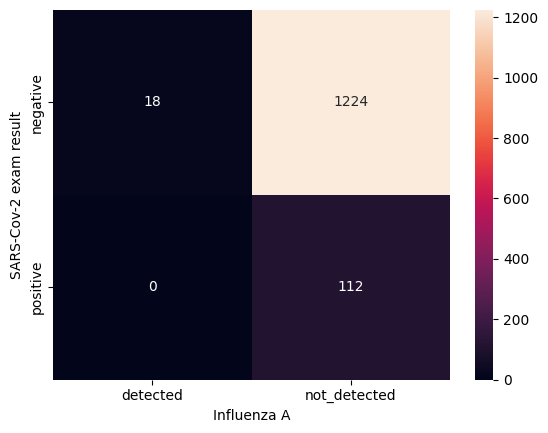

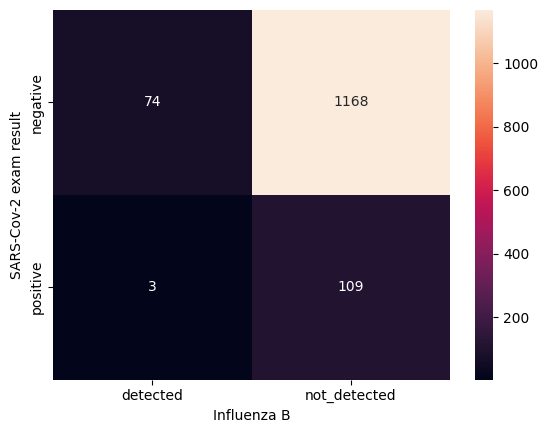

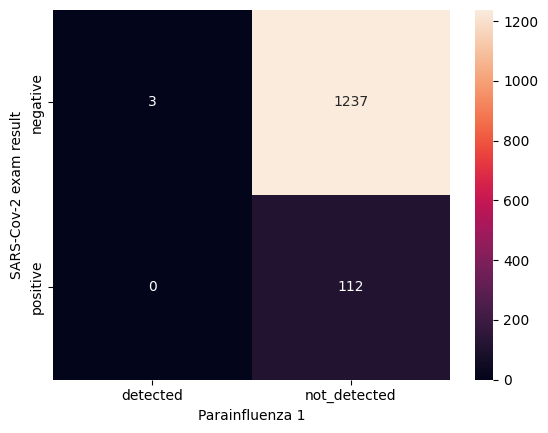

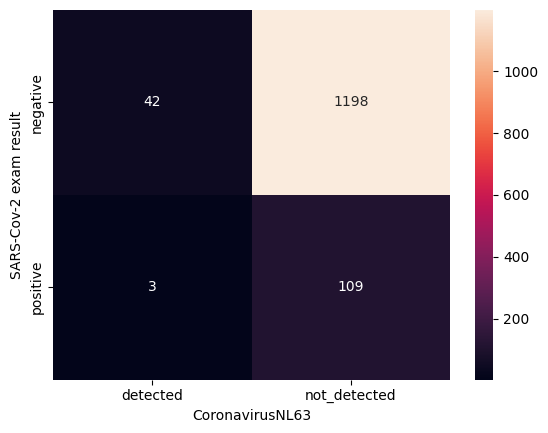

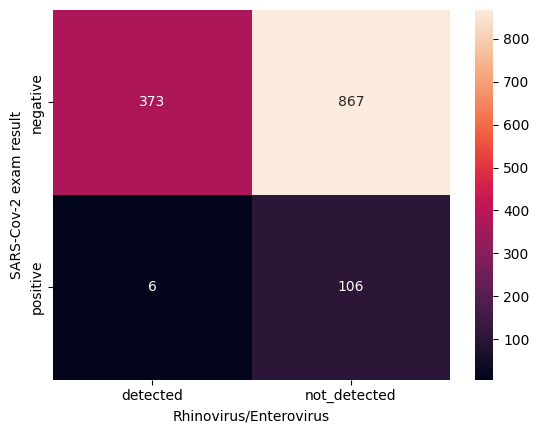

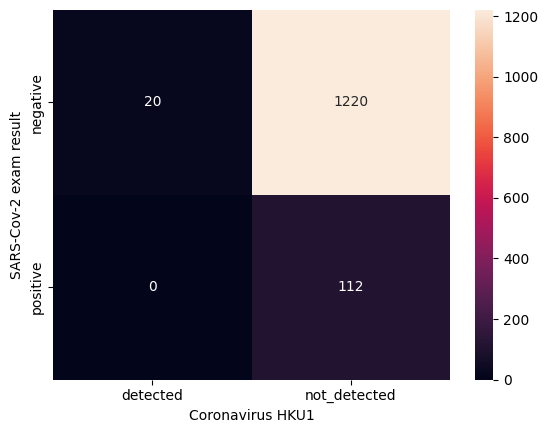

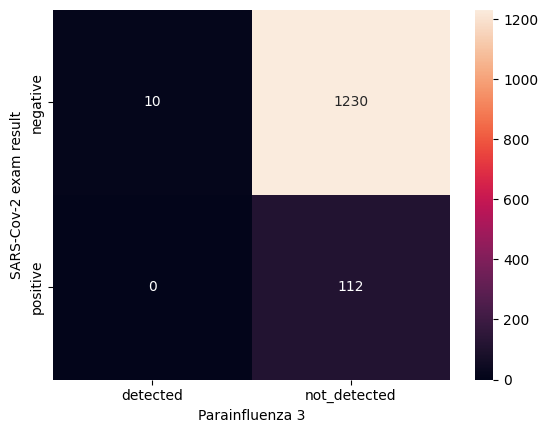

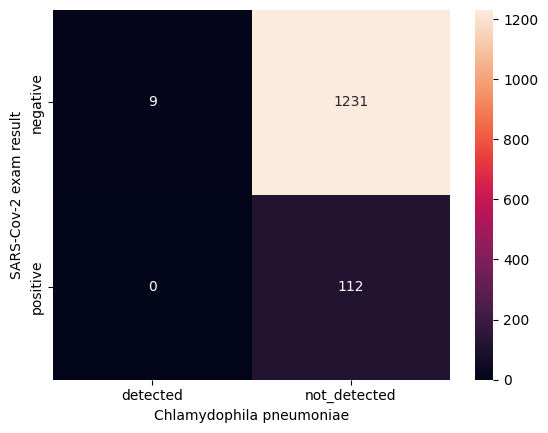

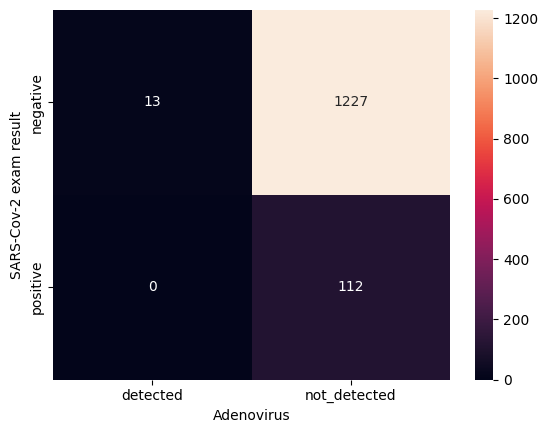

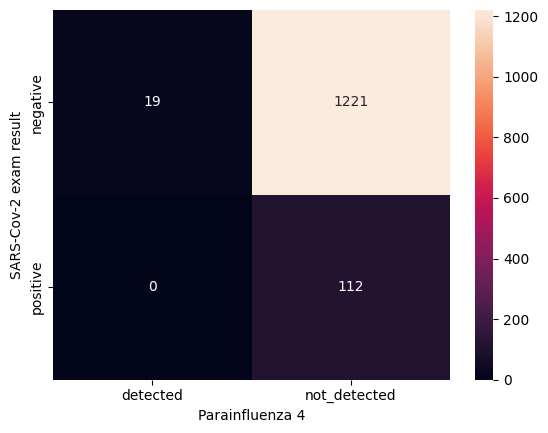

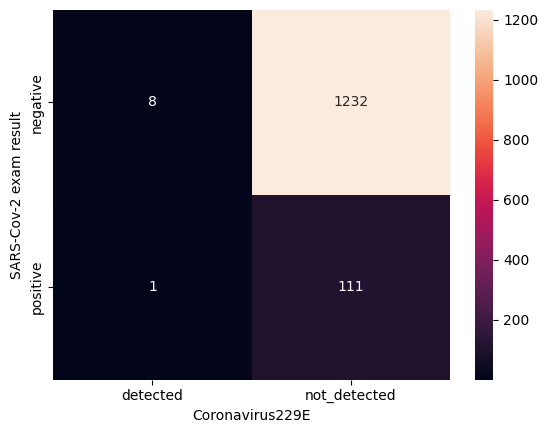

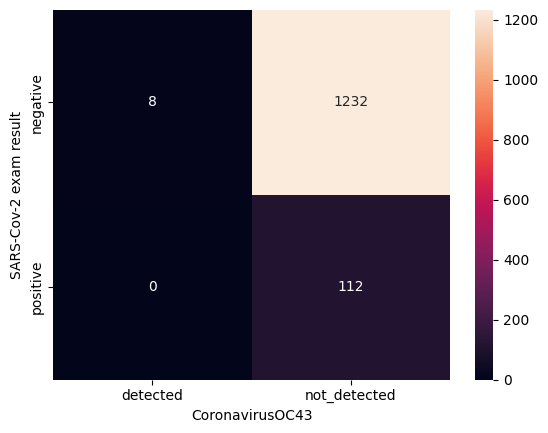

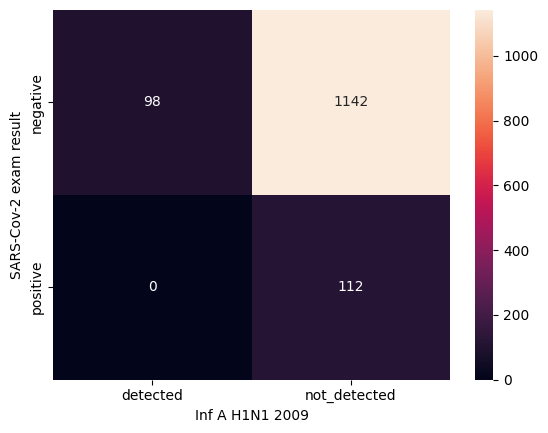

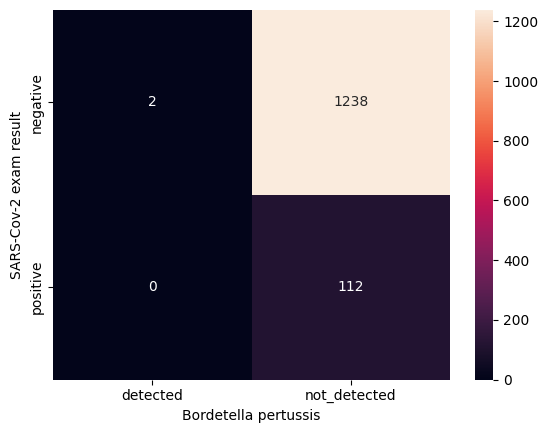

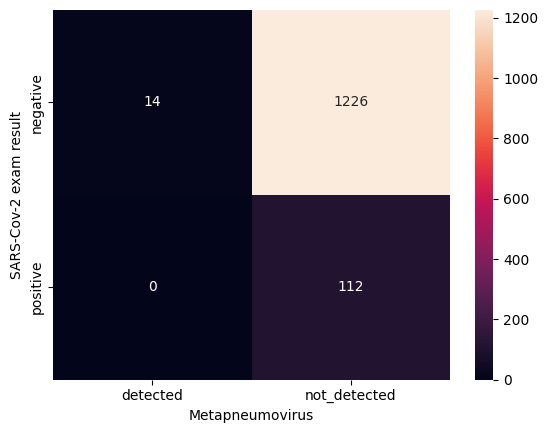

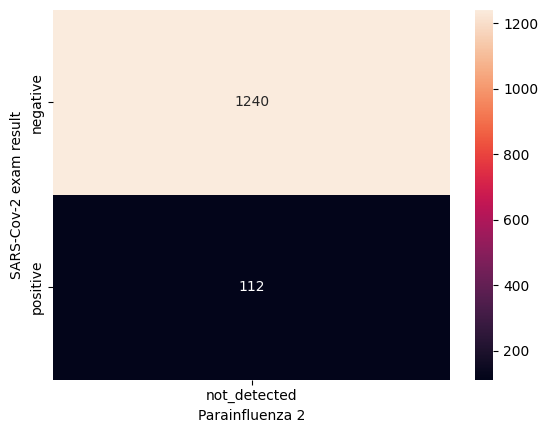

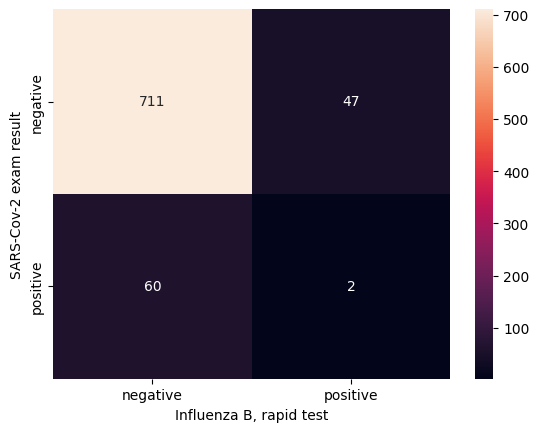

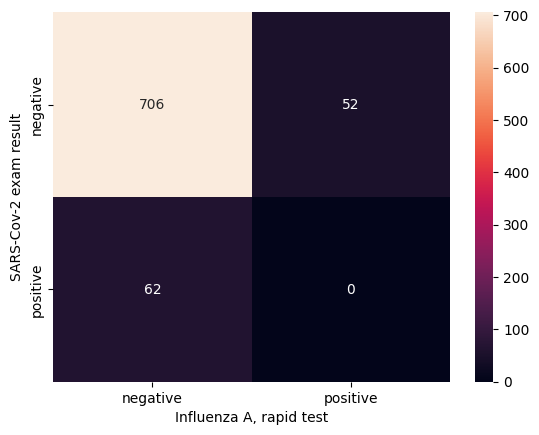

In [29]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

## More advanced analysis
### Relationship Variables / Variables
### Relationship Blood Rate

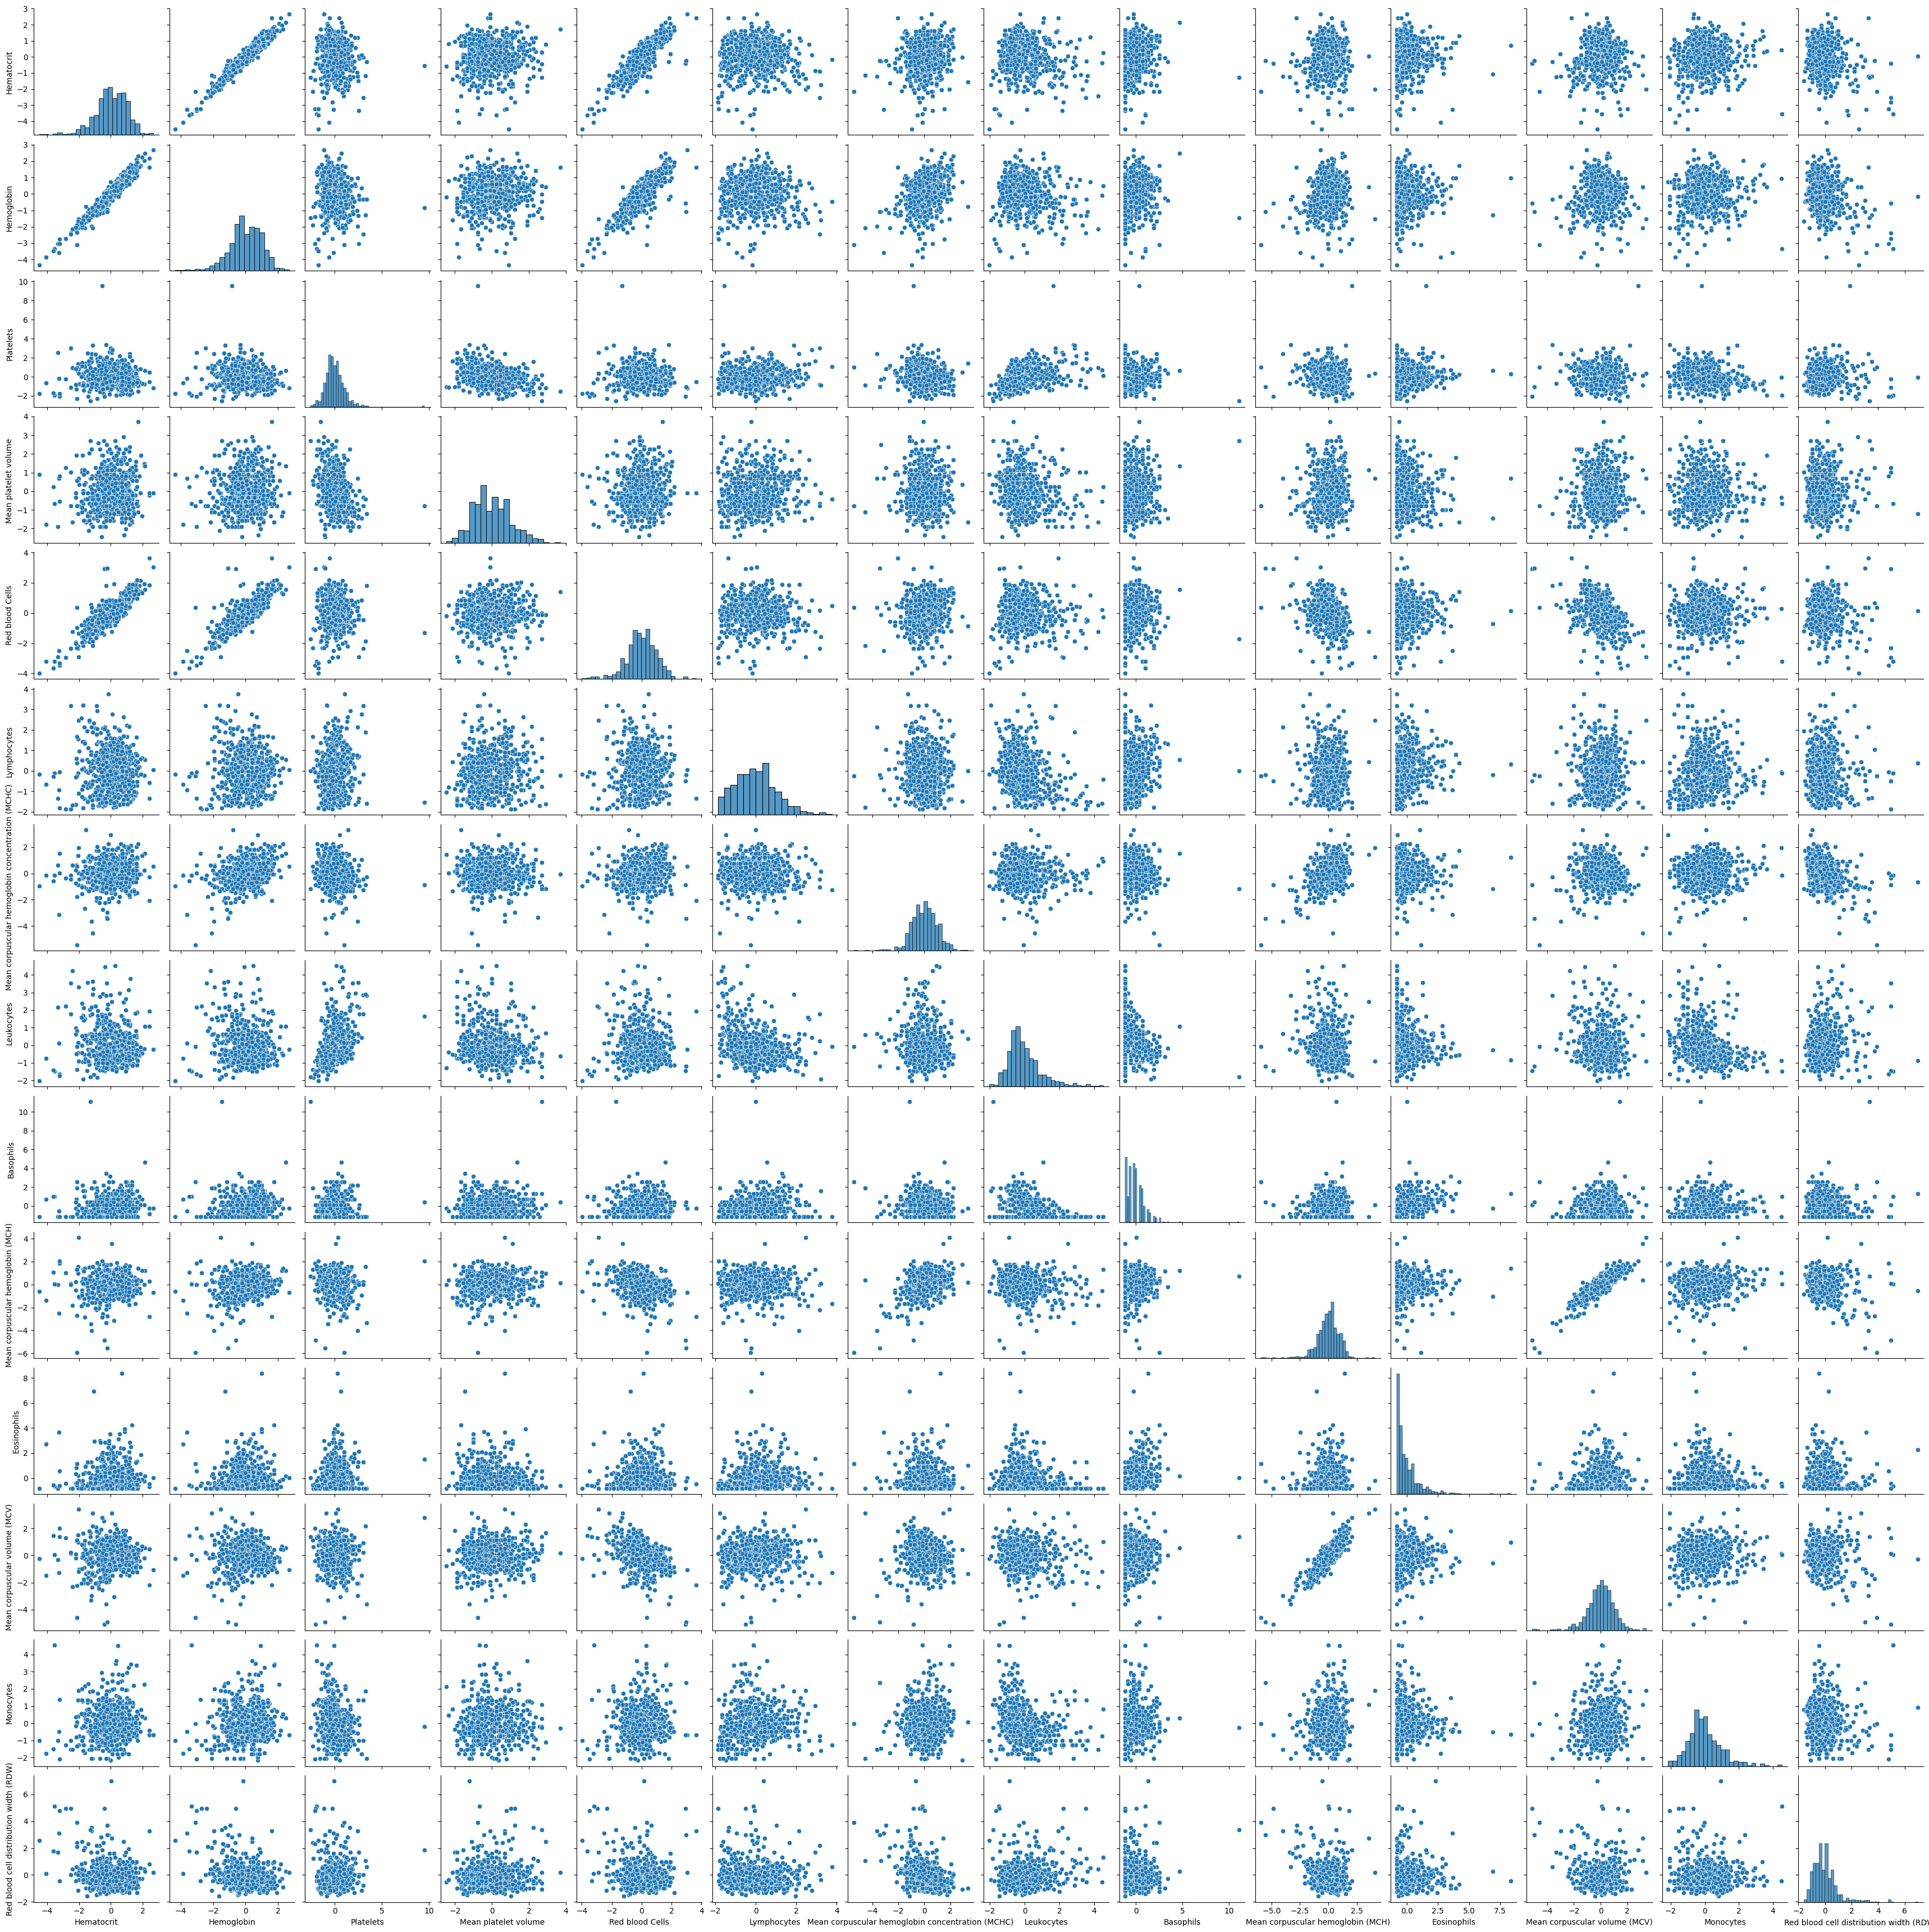

In [30]:
sns.pairplot(df[blood_columns])

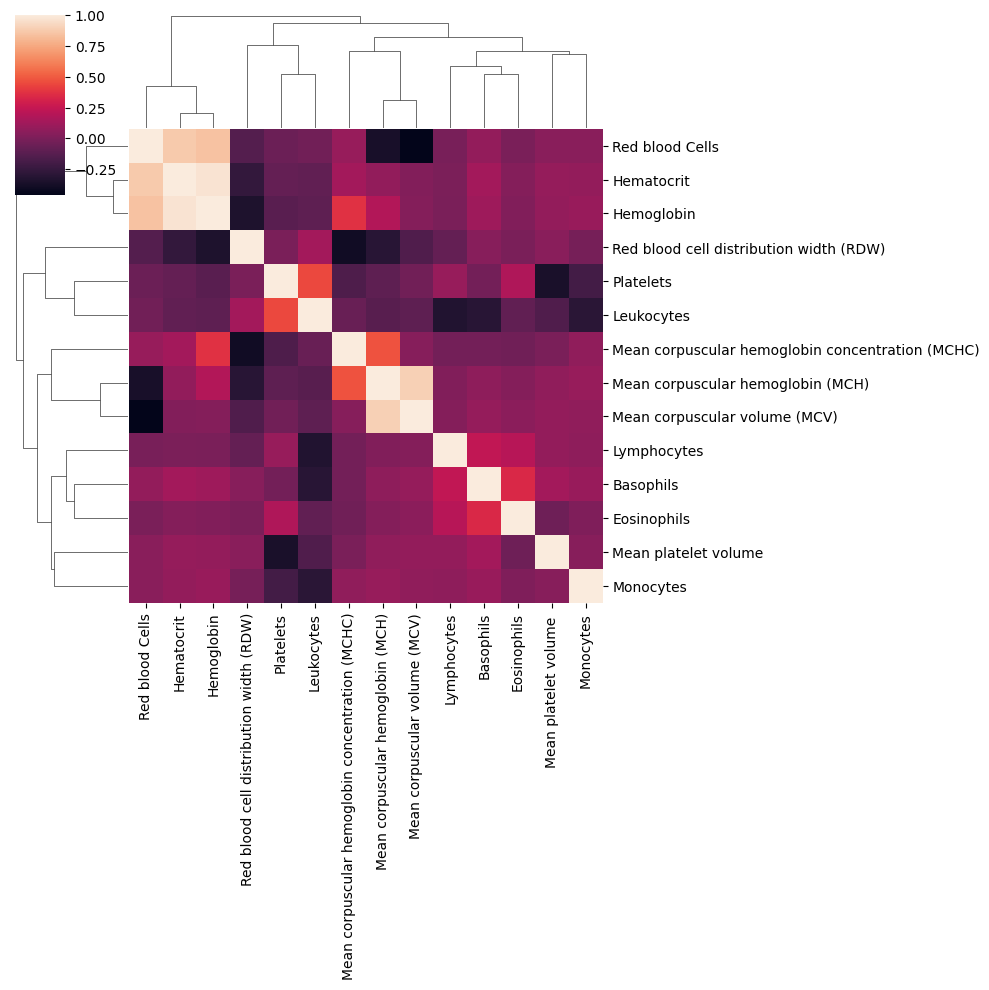

In [31]:
sns.clustermap(df[blood_columns].corr())

## Relationship Age / Blood

In [33]:
df.corr()['Patient age quantile'].sort_values()

<ipython-input-33-86652074ce4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Patient age quantile'].sort_values()


Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

<ipython-input-32-59fc838854ff>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

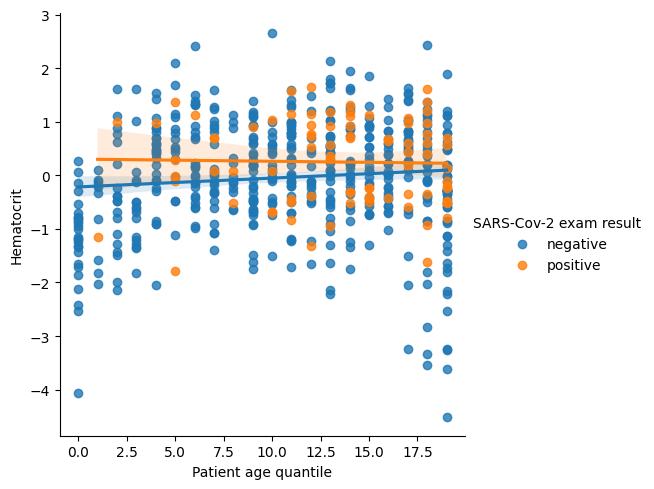

<Figure size 640x480 with 0 Axes>

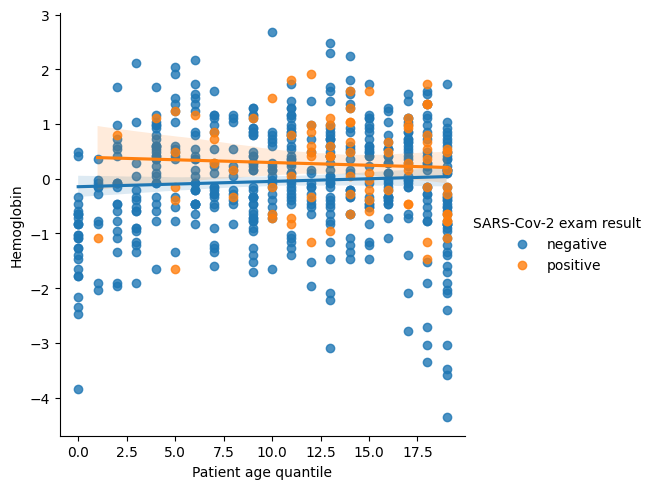

<Figure size 640x480 with 0 Axes>

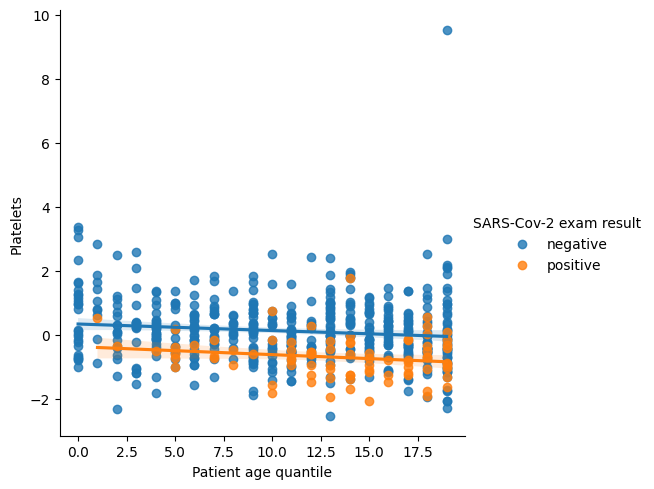

<Figure size 640x480 with 0 Axes>

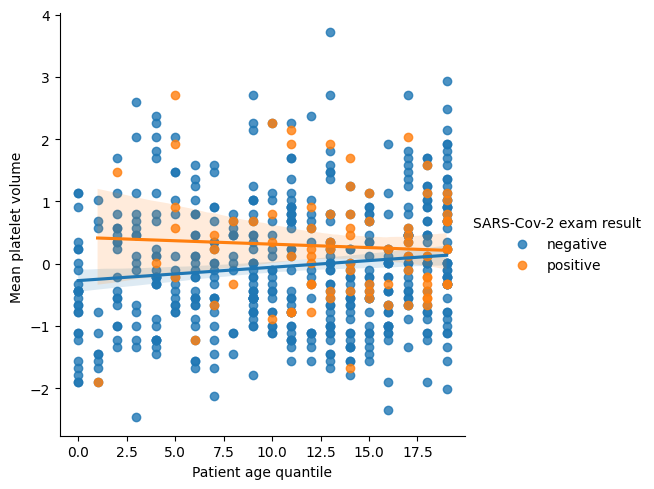

<Figure size 640x480 with 0 Axes>

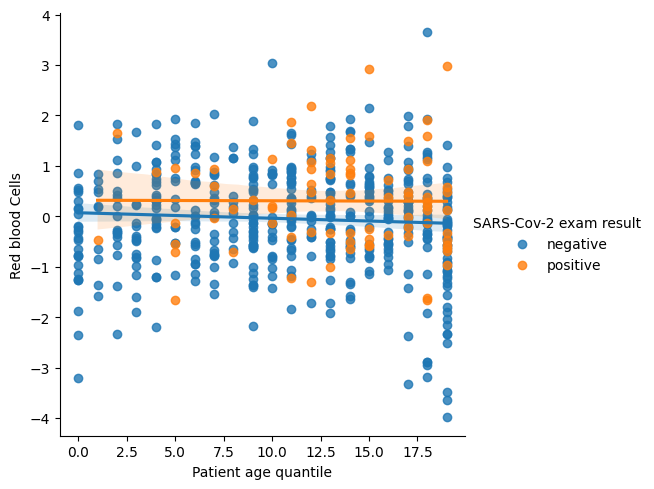

<Figure size 640x480 with 0 Axes>

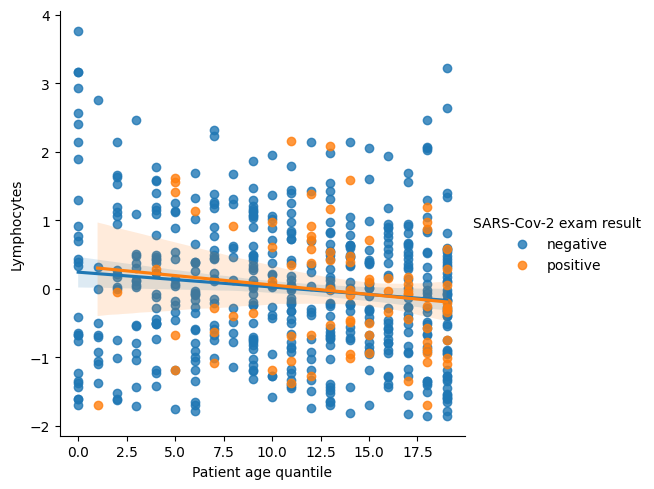

<Figure size 640x480 with 0 Axes>

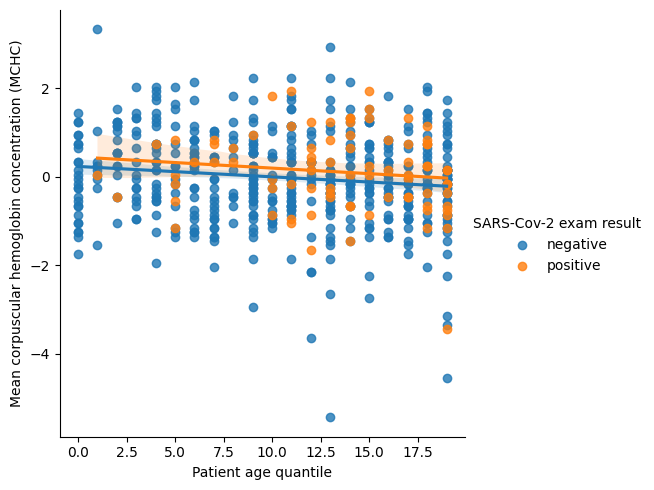

<Figure size 640x480 with 0 Axes>

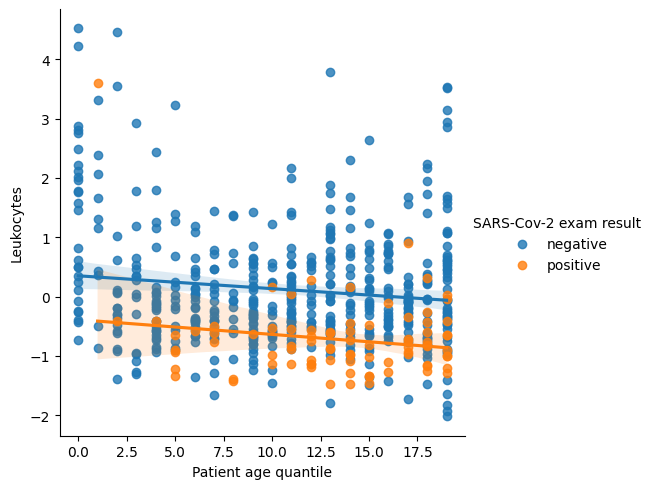

<Figure size 640x480 with 0 Axes>

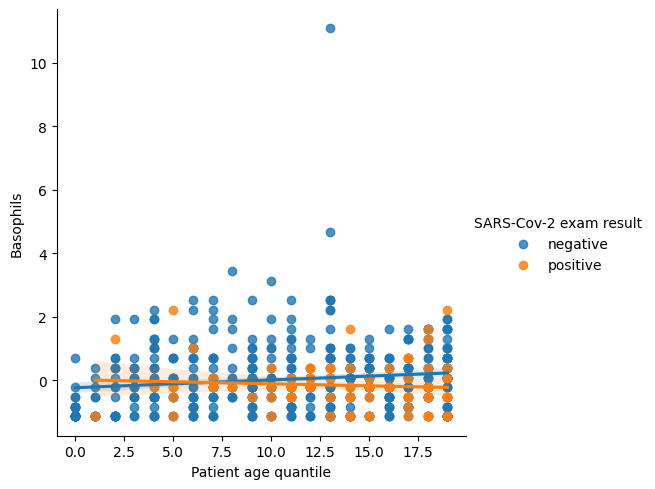

<Figure size 640x480 with 0 Axes>

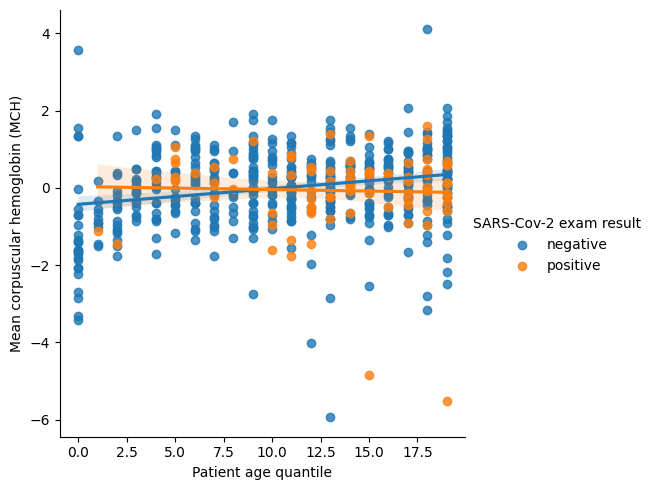

<Figure size 640x480 with 0 Axes>

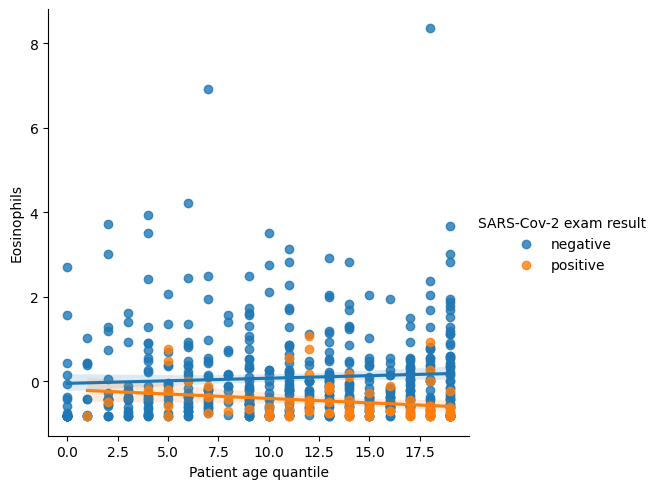

<Figure size 640x480 with 0 Axes>

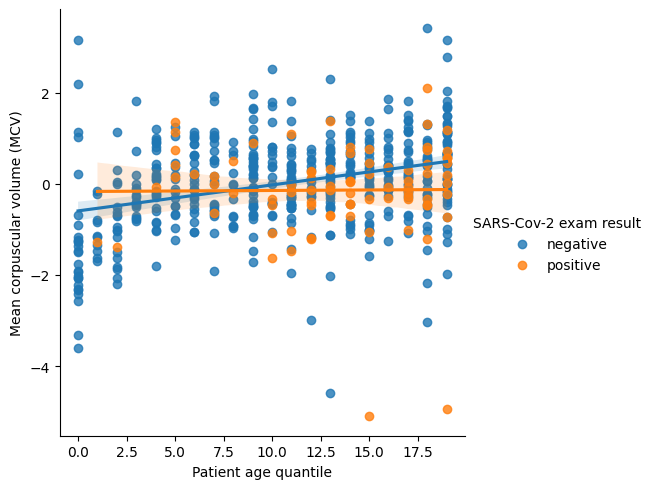

<Figure size 640x480 with 0 Axes>

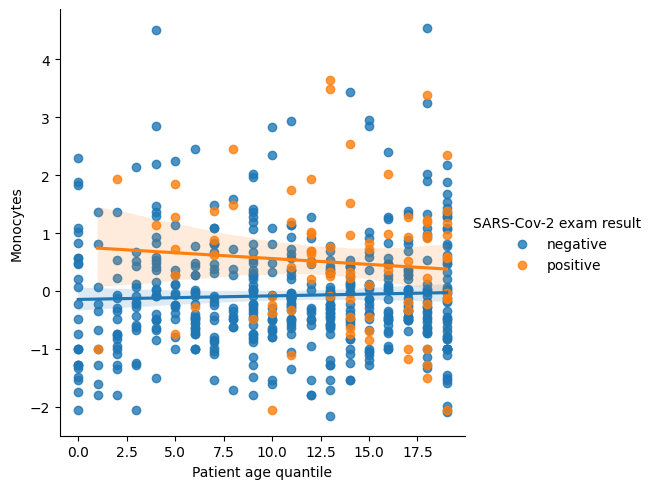

<Figure size 640x480 with 0 Axes>

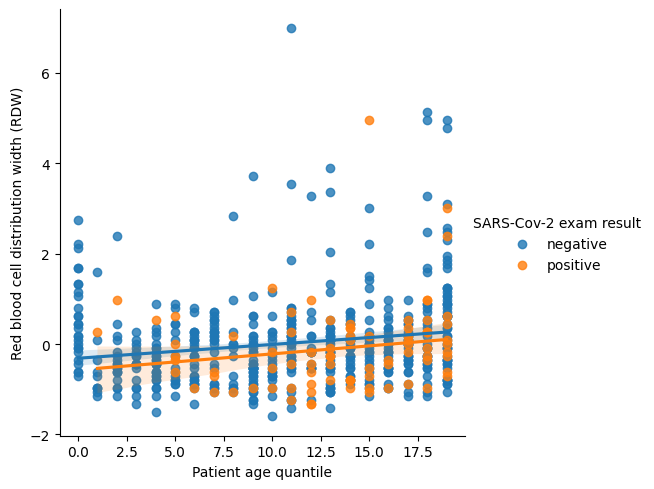

In [32]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

** Low correlation between age and blood levels

### Relationship Influenza & rapid test

In [34]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [35]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### Viral / blood relationship
#### Creation of a new variable "is ill".

In [36]:
df['is ill'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1

In [37]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


In [38]:
ill_df = df[df['is ill'] == True]
not_ill_df = df[df['is ill'] == False]

<ipython-input-39-287d20b292ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ill_df[col], label='ill')
<ipython-input-39-287d20b292ce>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_ill_df[col], label='not ill')
<ipython-input-39-287d20b292ce>:3: UserWarning: 

`distplot` is a deprecat

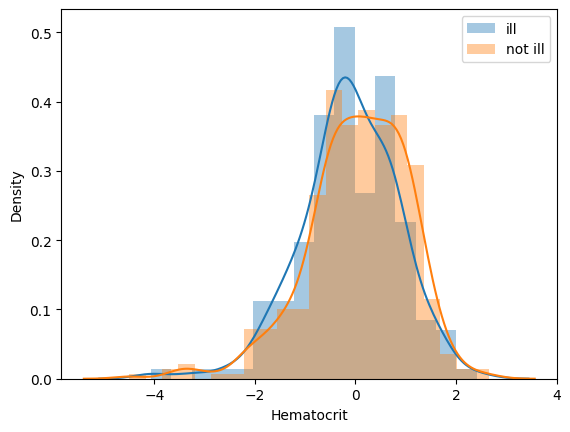

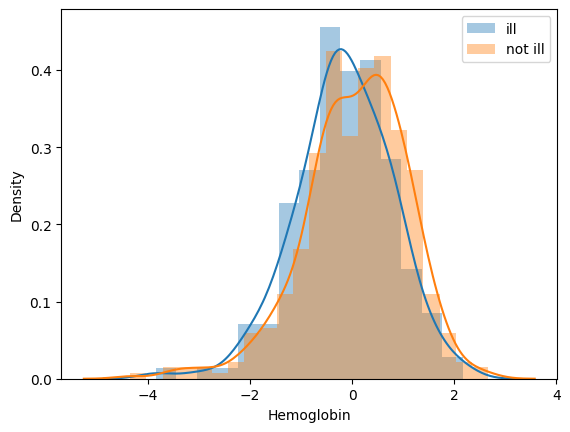

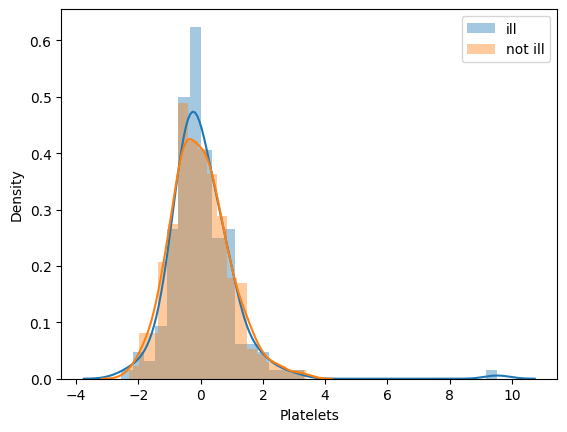

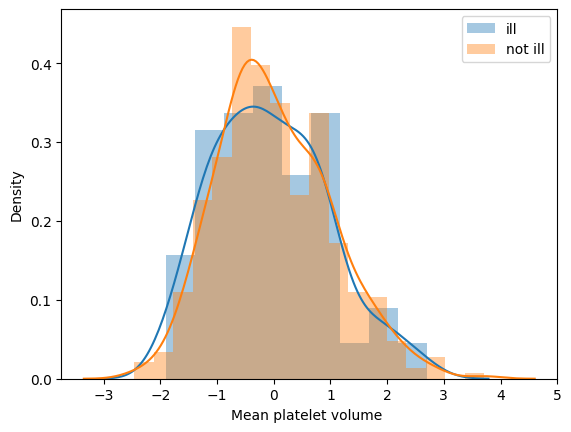

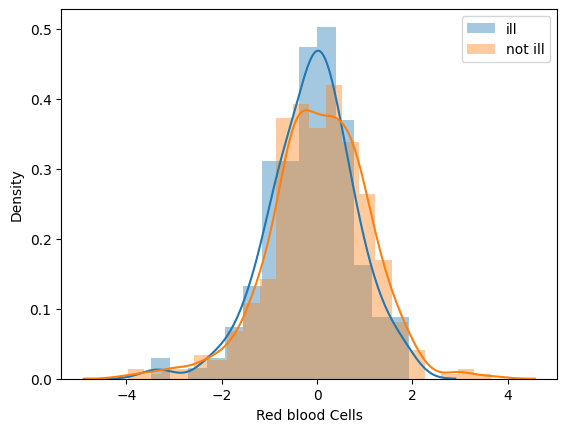

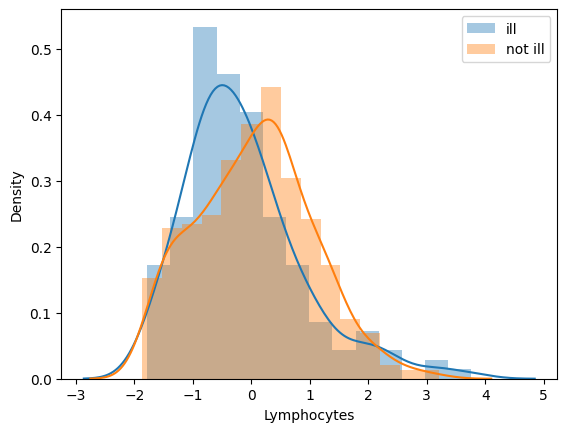

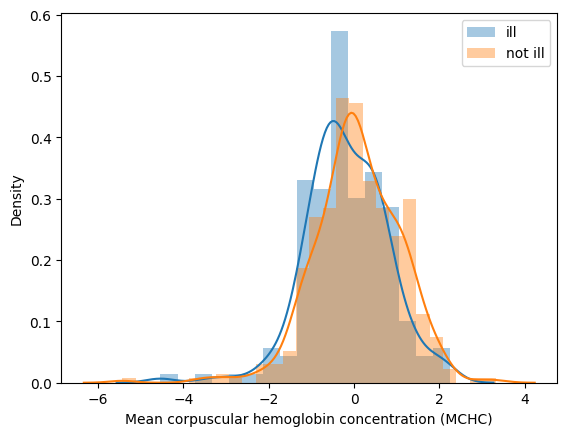

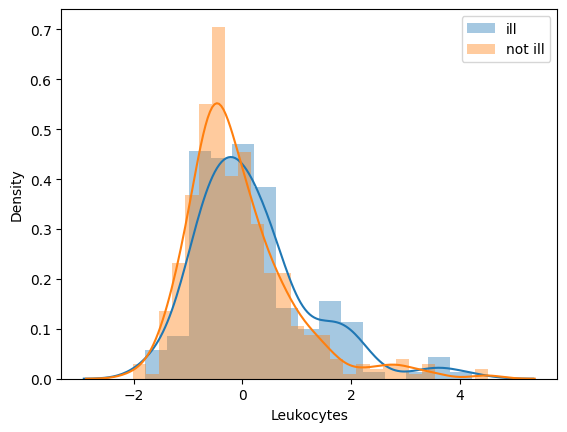

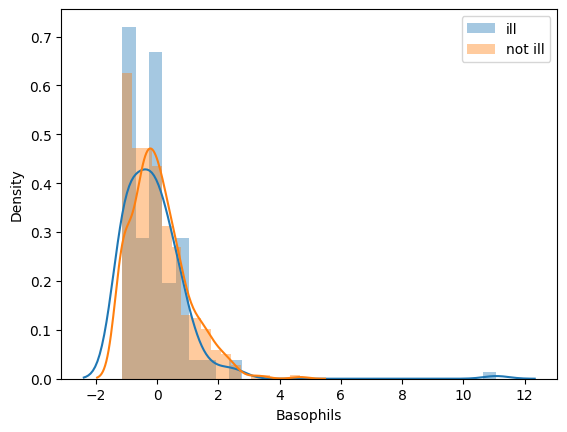

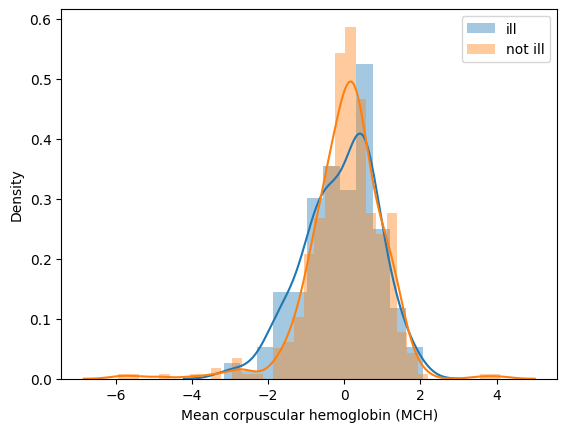

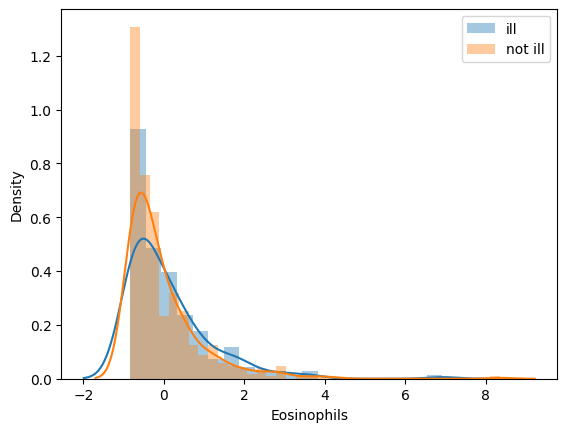

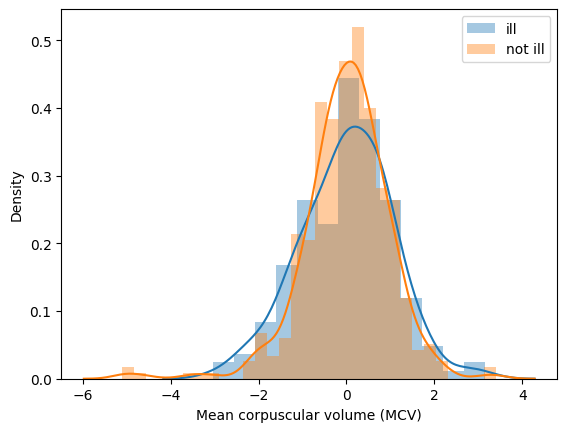

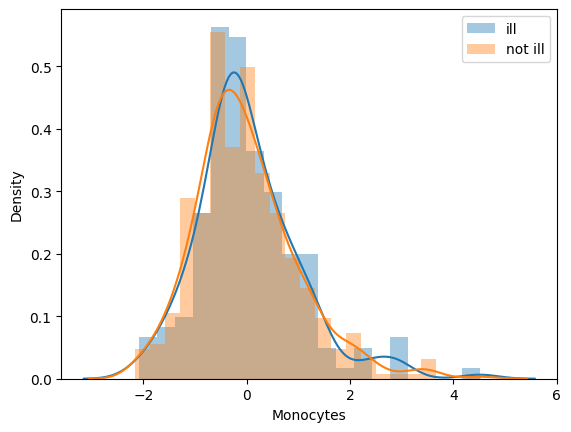

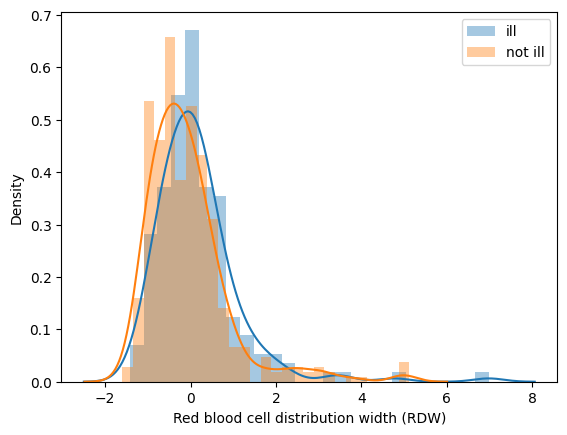

In [39]:
for col in blood_columns:
    plt.figure()
    sns.distplot(ill_df[col], label='ill')
    sns.distplot(not_ill_df[col], label='not ill')
    plt.legend()

In [43]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'monitoring'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensive care'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'intensive care'
    else:
        return 'unknown'

In [44]:
df['statut'] = df.apply(hospitalisation, axis=1)

In [45]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


<ipython-input-46-967150afcb24>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut']==cat][col], label=cat)
<ipython-input-46-967150afcb24>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut']==cat][col], label=cat)
<ipython-input-46-967150afcb24>:4: UserWarning: 

`distp

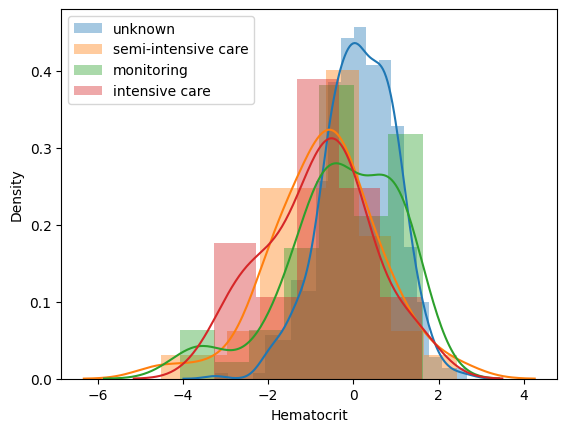

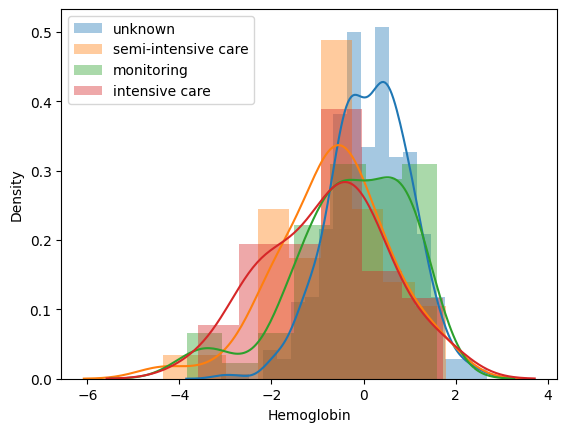

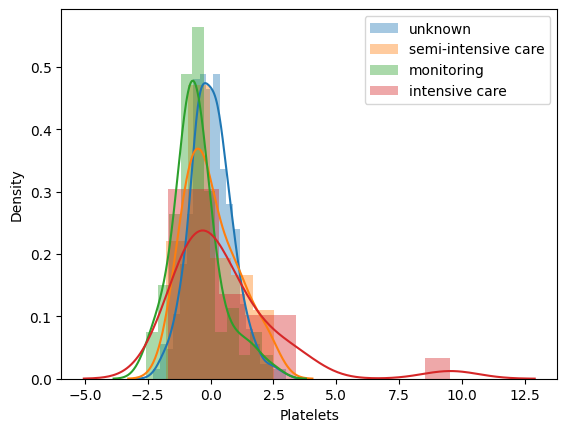

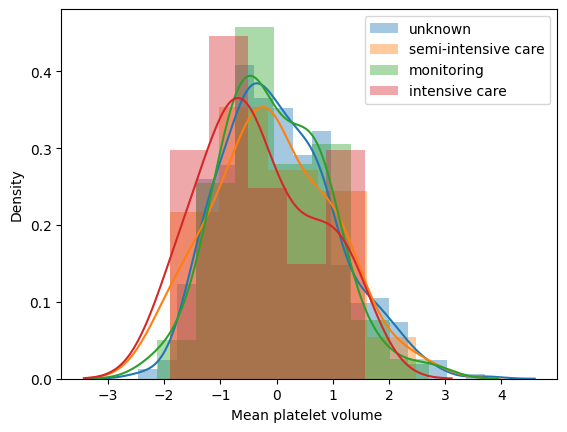

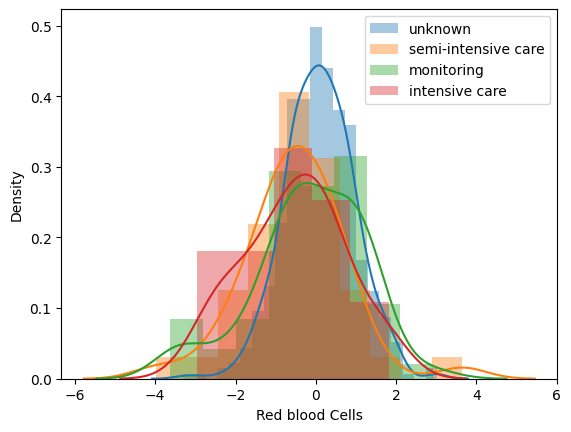

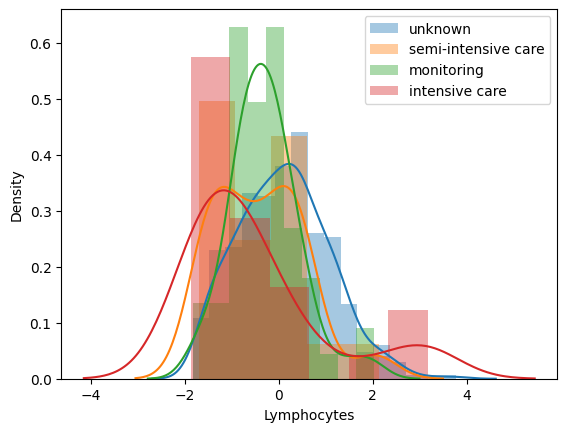

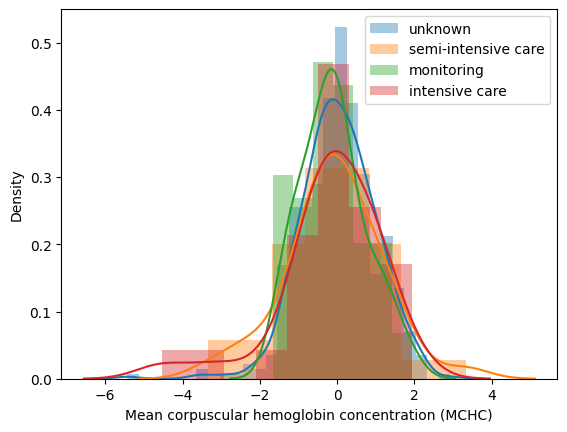

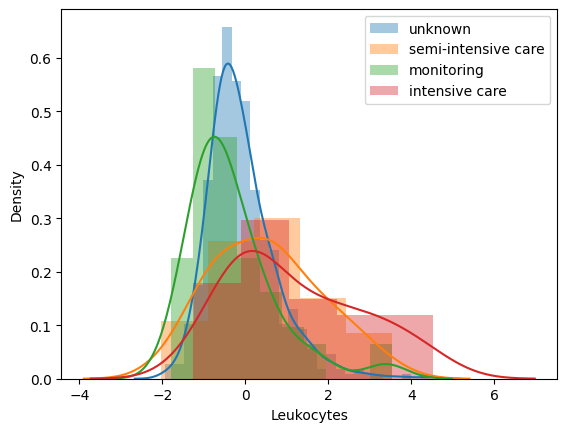

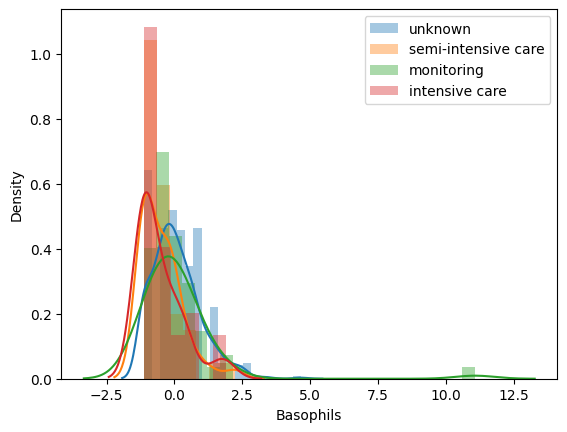

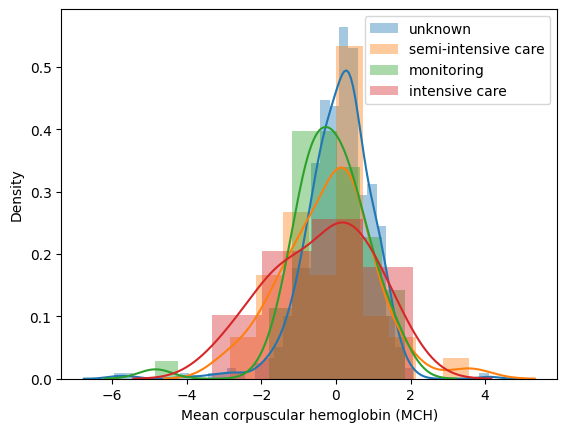

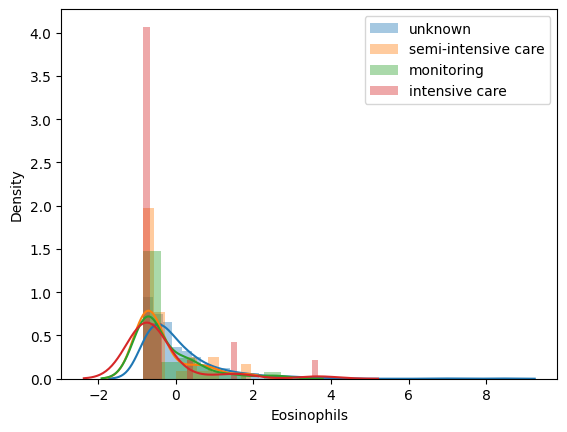

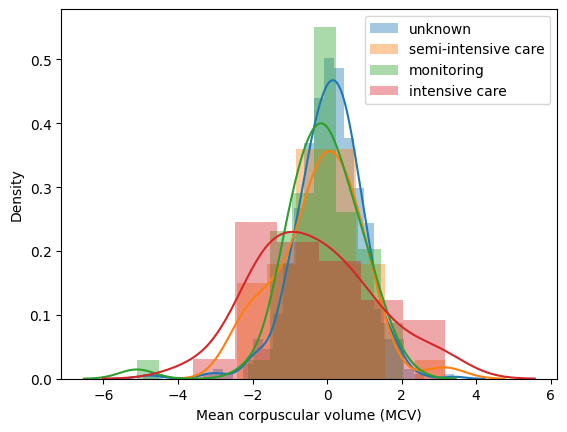

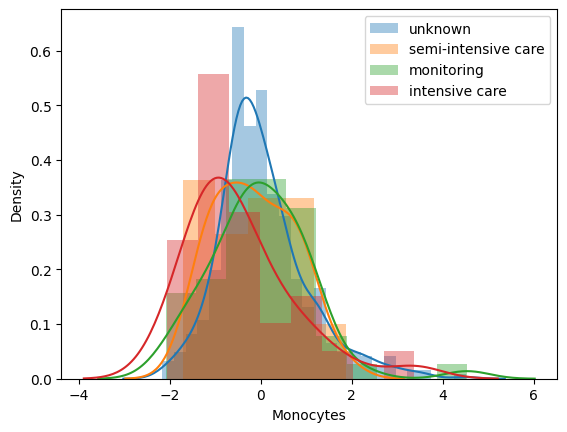

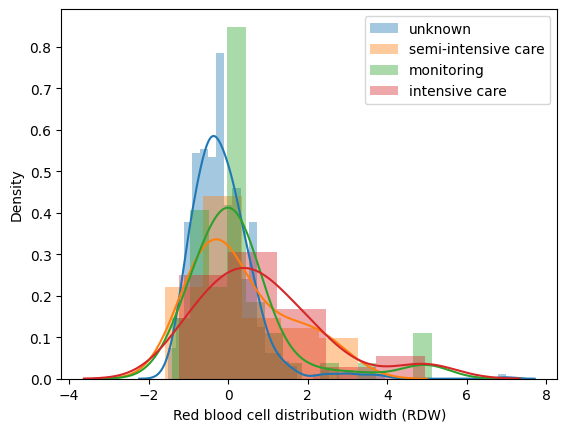

In [46]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

In [47]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [48]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [49]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

<ipython-input-49-e25a4f66b2f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [50]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

<ipython-input-50-a67cb712ccd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


negative    0.864548
positive    0.135452
Name: covid, dtype: float64